In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
matplotlib.rc('xtick', labelsize=25) 
matplotlib.rc('ytick', labelsize=25)

font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 25}

matplotlib.rc('font', **font)

In [5]:
# LES (reference data) solutions 
################################

# https://turbmodels.larc.nasa.gov/Other_LES_Data/2Dhill_periodic/README_p_vel_and_turb_hill.txt
p001 = np.loadtxt('../02_Data/Re_10595/UFR3-30TestCase/UFR3-30_C_10595_data_MB-001.dat')
p002 = np.loadtxt('../02_Data/Re_10595/UFR3-30TestCase/UFR3-30_C_10595_data_MB-002.dat')
p003 = np.loadtxt('../02_Data/Re_10595/UFR3-30TestCase/UFR3-30_C_10595_data_MB-003.dat')
p004 = np.loadtxt('../02_Data/Re_10595/UFR3-30TestCase/UFR3-30_C_10595_data_MB-004.dat')
p005 = np.loadtxt('../02_Data/Re_10595/UFR3-30TestCase/UFR3-30_C_10595_data_MB-005.dat')
p006 = np.loadtxt('../02_Data/Re_10595/UFR3-30TestCase/UFR3-30_C_10595_data_MB-006.dat')
p007 = np.loadtxt('../02_Data/Re_10595/UFR3-30TestCase/UFR3-30_C_10595_data_MB-007.dat')
p008 = np.loadtxt('../02_Data/Re_10595/UFR3-30TestCase/UFR3-30_C_10595_data_MB-008.dat')
p009 = np.loadtxt('../02_Data/Re_10595/UFR3-30TestCase/UFR3-30_C_10595_data_MB-009.dat')
p010 = np.loadtxt('../02_Data/Re_10595/UFR3-30TestCase/UFR3-30_C_10595_data_MB-010.dat')

REF = [p001, p002, p003, p004, p005, p006, p007, p008, p009, p010]

# 3 Clusters

In [7]:
path = "../04_Simulation/3.CLUSTERING/in-the-loop/PH_gen100_pop100_symUVKRxy_parIs/cluster0/run_00511/PH_2D_RANS_kOmegaSSTx/postProcessing/sets/8001/"
cluster0_U = np.loadtxt(path+'cluster0_U.xy')
cluster0_k = np.loadtxt(path+'cluster0_k.xy')
cluster0_R = np.loadtxt(path+'cluster0_R.xy')

path = "../04_Simulation/3.CLUSTERING/in-the-loop/PH_gen100_pop100_symUVKRxy_parIs/cluster1/run_00485/PH_2D_RANS_kOmegaSSTx/postProcessing/sets/7551/"
cluster1_U = np.loadtxt(path+'cluster1_U.xy')
cluster1_k = np.loadtxt(path+'cluster1_k.xy')
cluster1_R = np.loadtxt(path+'cluster1_R.xy')

path = "../04_Simulation/3.CLUSTERING/in-the-loop/PH_gen100_pop100_symUVKRxy_parIs/cluster2/run_00594/PH_2D_RANS_kOmegaSSTx/postProcessing/sets/8292/"
cluster2_U = np.loadtxt(path+'cluster2_U.xy')
cluster2_k = np.loadtxt(path+'cluster2_k.xy')
cluster2_R = np.loadtxt(path+'cluster2_R.xy')

In [17]:
#c0 = pd.DataFrame(np.sort(cluster0_U, axis=0), columns = ['X','Y','Z','U', "V", "W"])
#c1 = pd.DataFrame(np.sort(cluster1_U, axis=0), columns = ['X','Y','Z','U', "V", "W"])
#c2 = pd.DataFrame(np.sort(cluster2_U, axis=0), columns = ['X','Y','Z','U', "V", "W"])

c0 = pd.DataFrame(cluster0_U, columns = ['X','Y','Z','U', "V", "W"])
c1 = pd.DataFrame(cluster1_U, columns = ['X','Y','Z','U', "V", "W"])
c2 = pd.DataFrame(cluster2_U, columns = ['X','Y','Z','U', "V", "W"])

In [10]:
l0c0 = c0[c0['X']==0.05]
l05c0 = c0[c0['X']==0.5]
l1c0 = c0[c0['X']==1]
l2c0 = c0[c0['X']==2]
l3c0 = c0[c0['X']==3]
l4c0 = c0[c0['X']==4]
l5c0 = c0[c0['X']==5]
l6c0 = c0[c0['X']==6]
l7c0 = c0[c0['X']==7]
l8c0 = c0[c0['X']==8]

l0c1 = c1[c1['X']==0.05]
l05c1 = c1[c1['X']==0.5]
l1c1 = c1[c1['X']==1]
l2c1 = c1[c1['X']==2]
l3c1 = c1[c1['X']==3]
l4c1 = c1[c1['X']==4]
l5c1 = c1[c1['X']==5]
l6c1 = c1[c1['X']==6]
l7c1 = c1[c1['X']==7]
l8c1 = c1[c1['X']==8]

l0c2 = c2[c2['X']==0.05]
l05c2 = c2[c2['X']==0.5]
l1c2 = c2[c2['X']==1]
l2c2 = c2[c2['X']==2]
l3c2 = c2[c2['X']==3]
l4c2 = c2[c2['X']==4]
l5c2 = c2[c2['X']==5]
l6c2 = c2[c2['X']==6]
l7c2 = c2[c2['X']==7]
l8c2 = c2[c2['X']==8]

In [96]:
from scipy.spatial import KDTree

locations = [0.05, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]

for l in range(len(REF)): 
    
        loc = locations[l]
        
        line_index = []
        
        tree = KDTree(np.c_[loc*np.ones(REF[l][:,0].shape), REF[l][:,0]])
        
        for j in range(len(c0['X'])): 
            
            dd, ii = tree.query([c0['X'].iloc[j], c0['Y'].iloc[j]], k=1, distance_upper_bound=0.01)
    
            line_index.append(ii)
        
        line = "X"+str(l)+"_c0.index"
        np.savetxt(line, np.unique(line_index), fmt='%i')   
        
        
for l in range(len(REF)): 
    
        loc = locations[l]
        
        line_index = []
        
        tree = KDTree(np.c_[loc*np.ones(REF[l][:,0].shape), REF[l][:,0]])
        
        for j in range(len(c1['X'])): 
            
            dd, ii = tree.query([c1['X'].iloc[j], c1['Y'].iloc[j]], k=1, distance_upper_bound=0.01)
    
            line_index.append(ii)
        
        line = "X"+str(l)+"_c1.index"
        np.savetxt(line, np.unique(line_index), fmt='%i')         
        

for l in range(len(REF)): 
    
        loc = locations[l]
        
        line_index = []
        
        tree = KDTree(np.c_[loc*np.ones(REF[l][:,0].shape), REF[l][:,0]])
        
        for j in range(len(c2['X'])): 
            
            dd, ii = tree.query([c2['X'].iloc[j], c2['Y'].iloc[j]], k=1, distance_upper_bound=0.01)
    
            line_index.append(ii)
        
        line = "X"+str(l)+"_c2.index"
        np.savetxt(line, np.unique(line_index), fmt='%i') 

0.05 0
(95,) (95,) (95,) (95,) (95,) (95,) (95,) (95,)
(0,) (0,) (0,) (0,) (0,) (0,) (0,) (0,)
(227,) (227,) (227,) (227,) (227,) (227,) (227,) (227,)


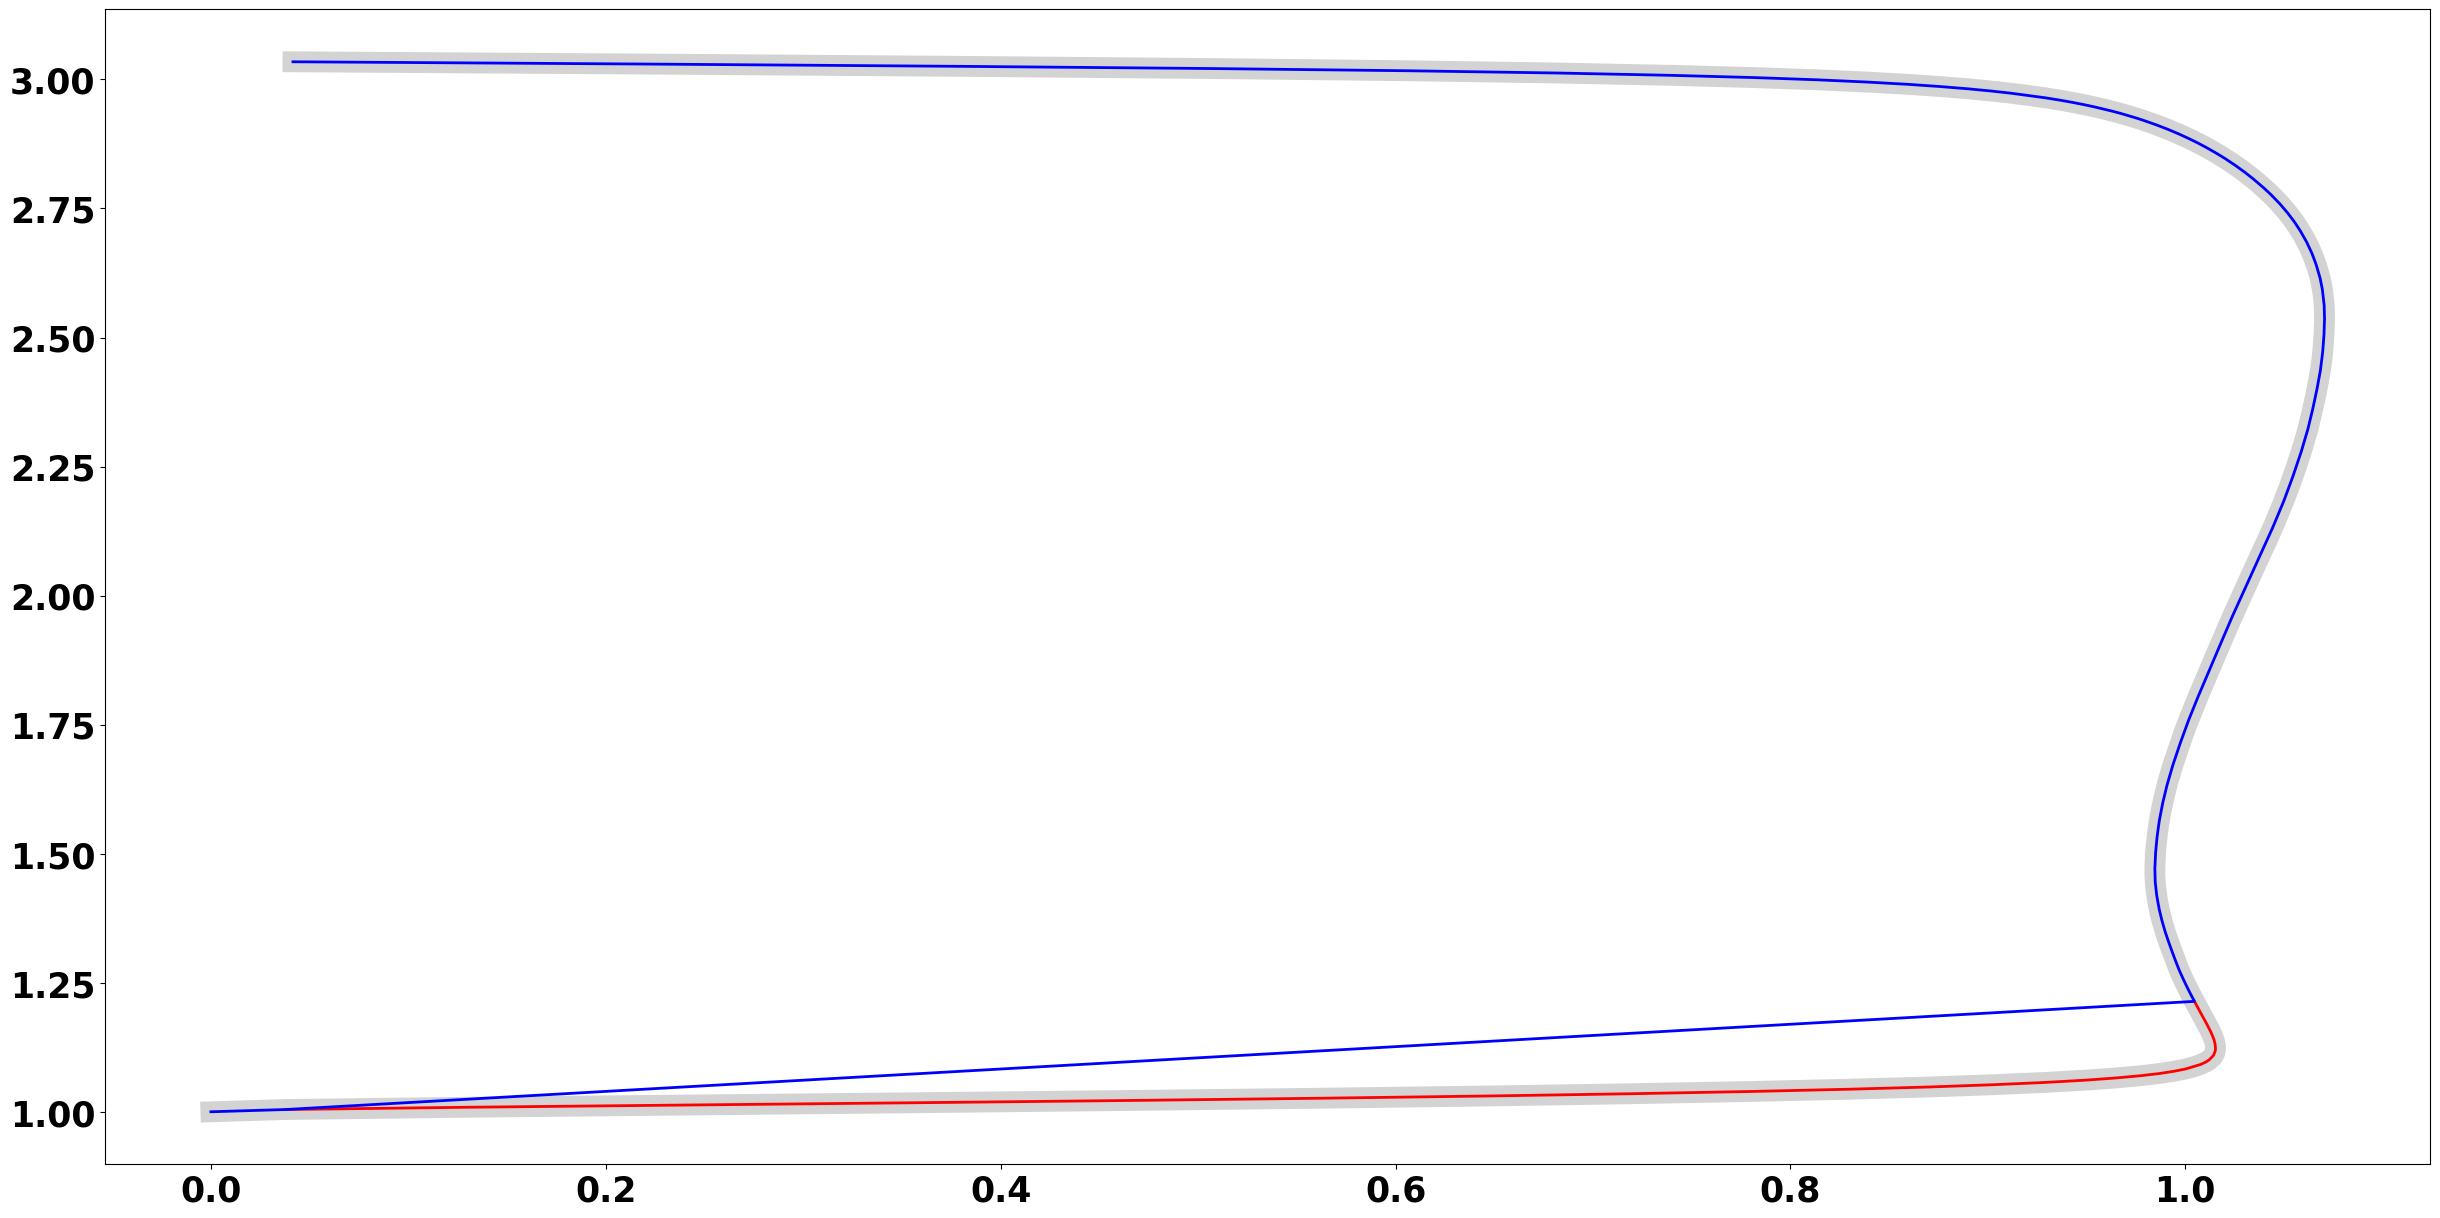

0.5 1
(0,) (0,) (0,) (0,) (0,) (0,) (0,) (0,)
(0,) (0,) (0,) (0,) (0,) (0,) (0,) (0,)
(0,) (0,) (0,) (0,) (0,) (0,) (0,) (0,)


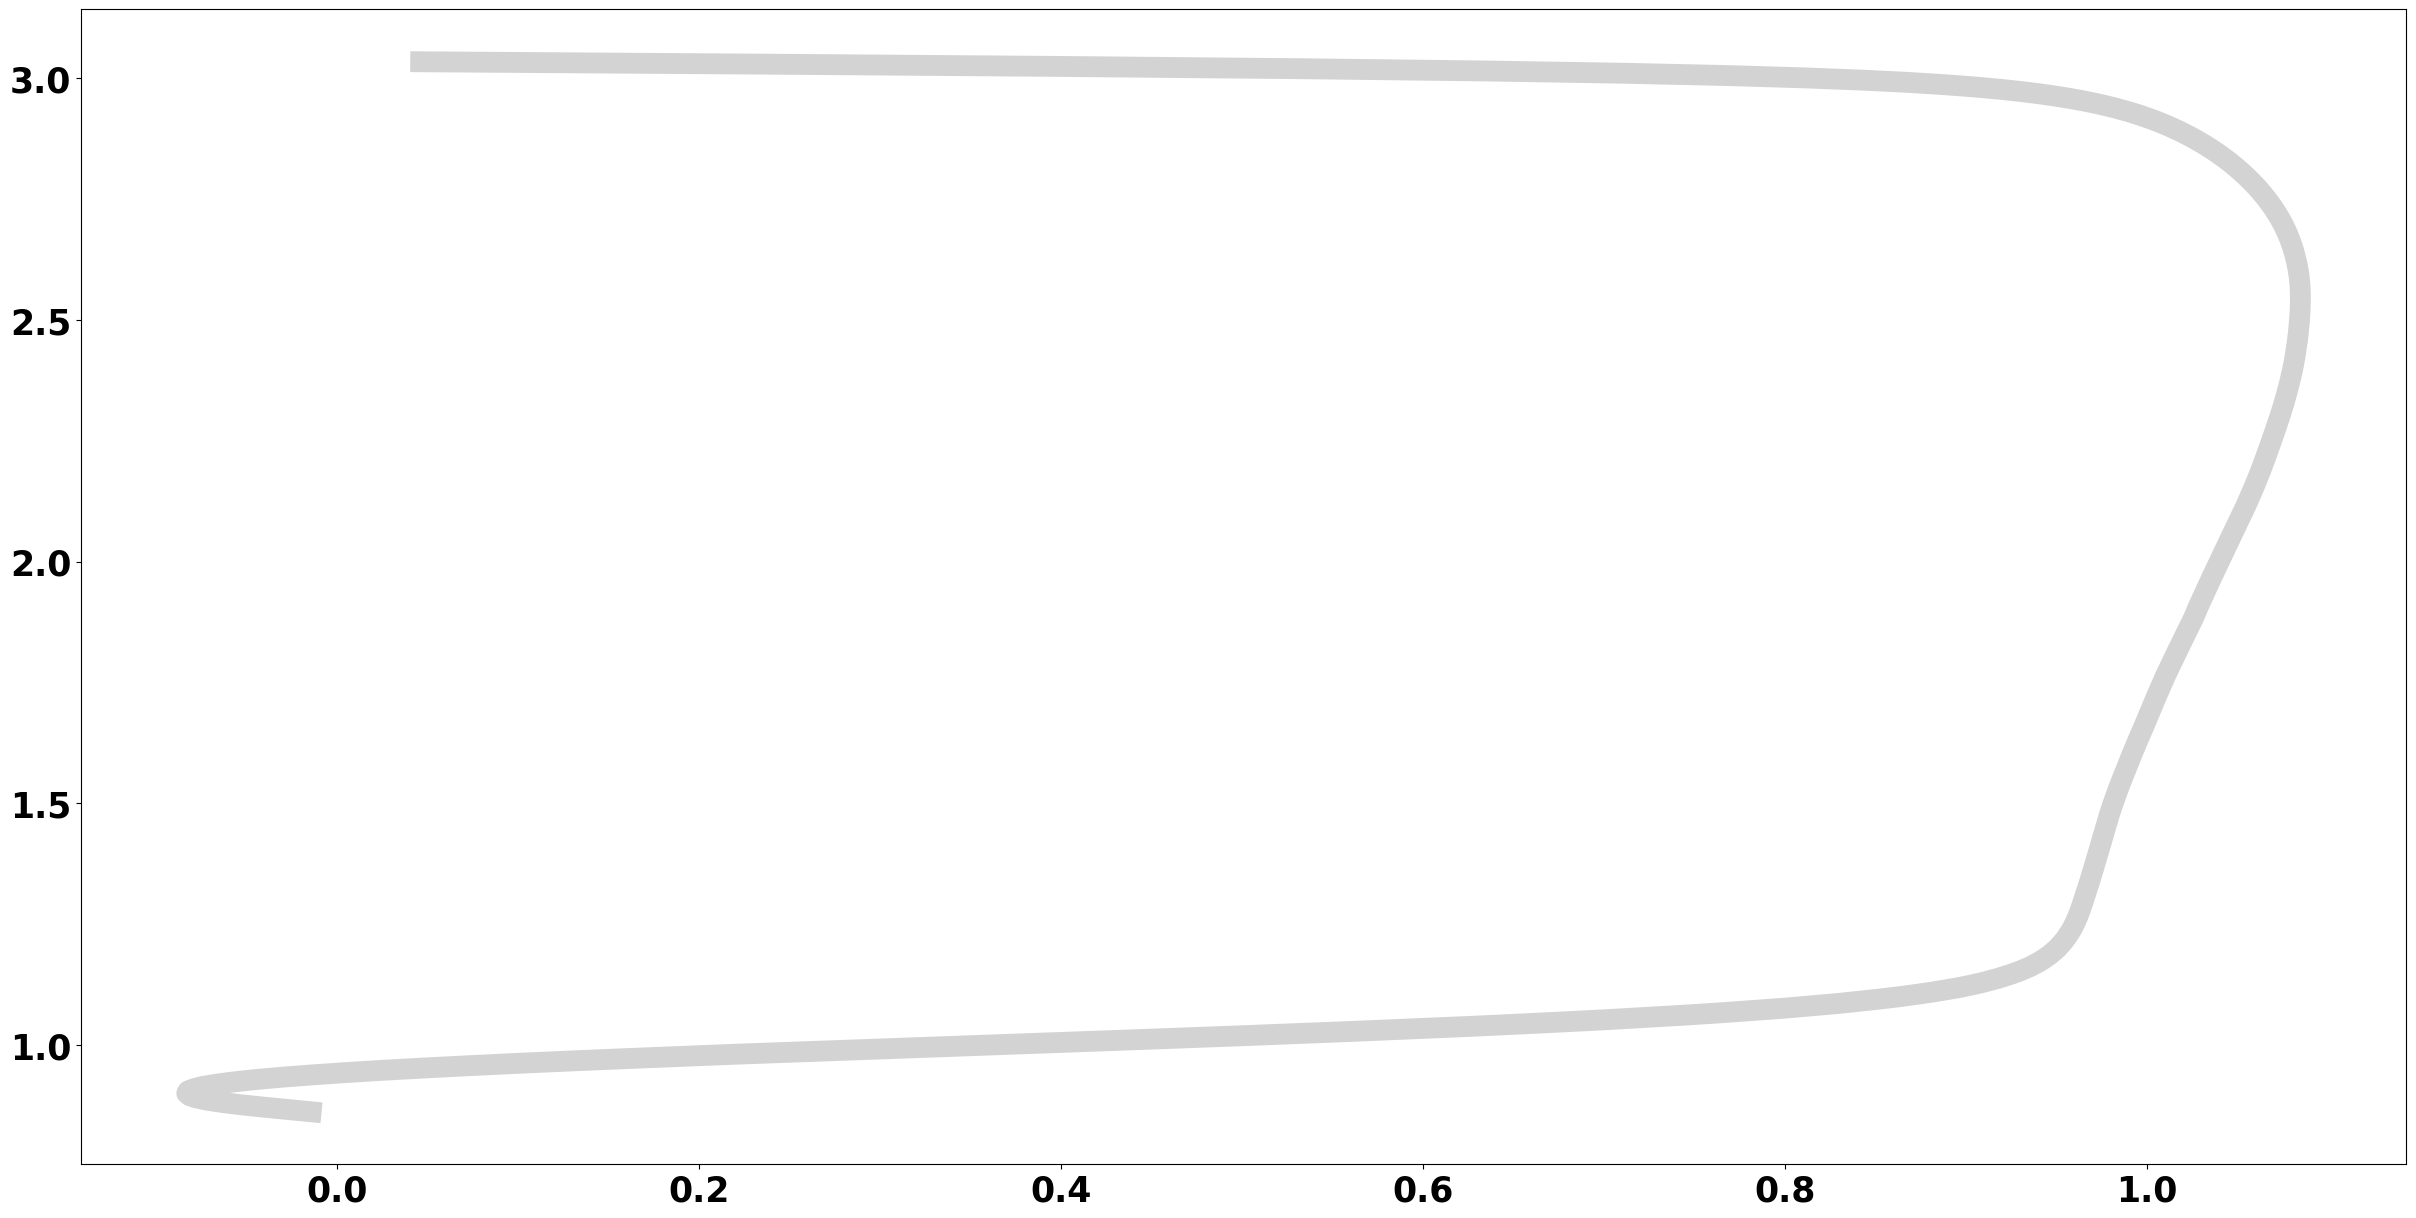

1.0 2
(75,) (75,) (75,) (75,) (75,) (75,) (75,) (75,)
(51,) (51,) (51,) (51,) (51,) (51,) (51,) (51,)
(221,) (221,) (221,) (221,) (221,) (221,) (221,) (221,)


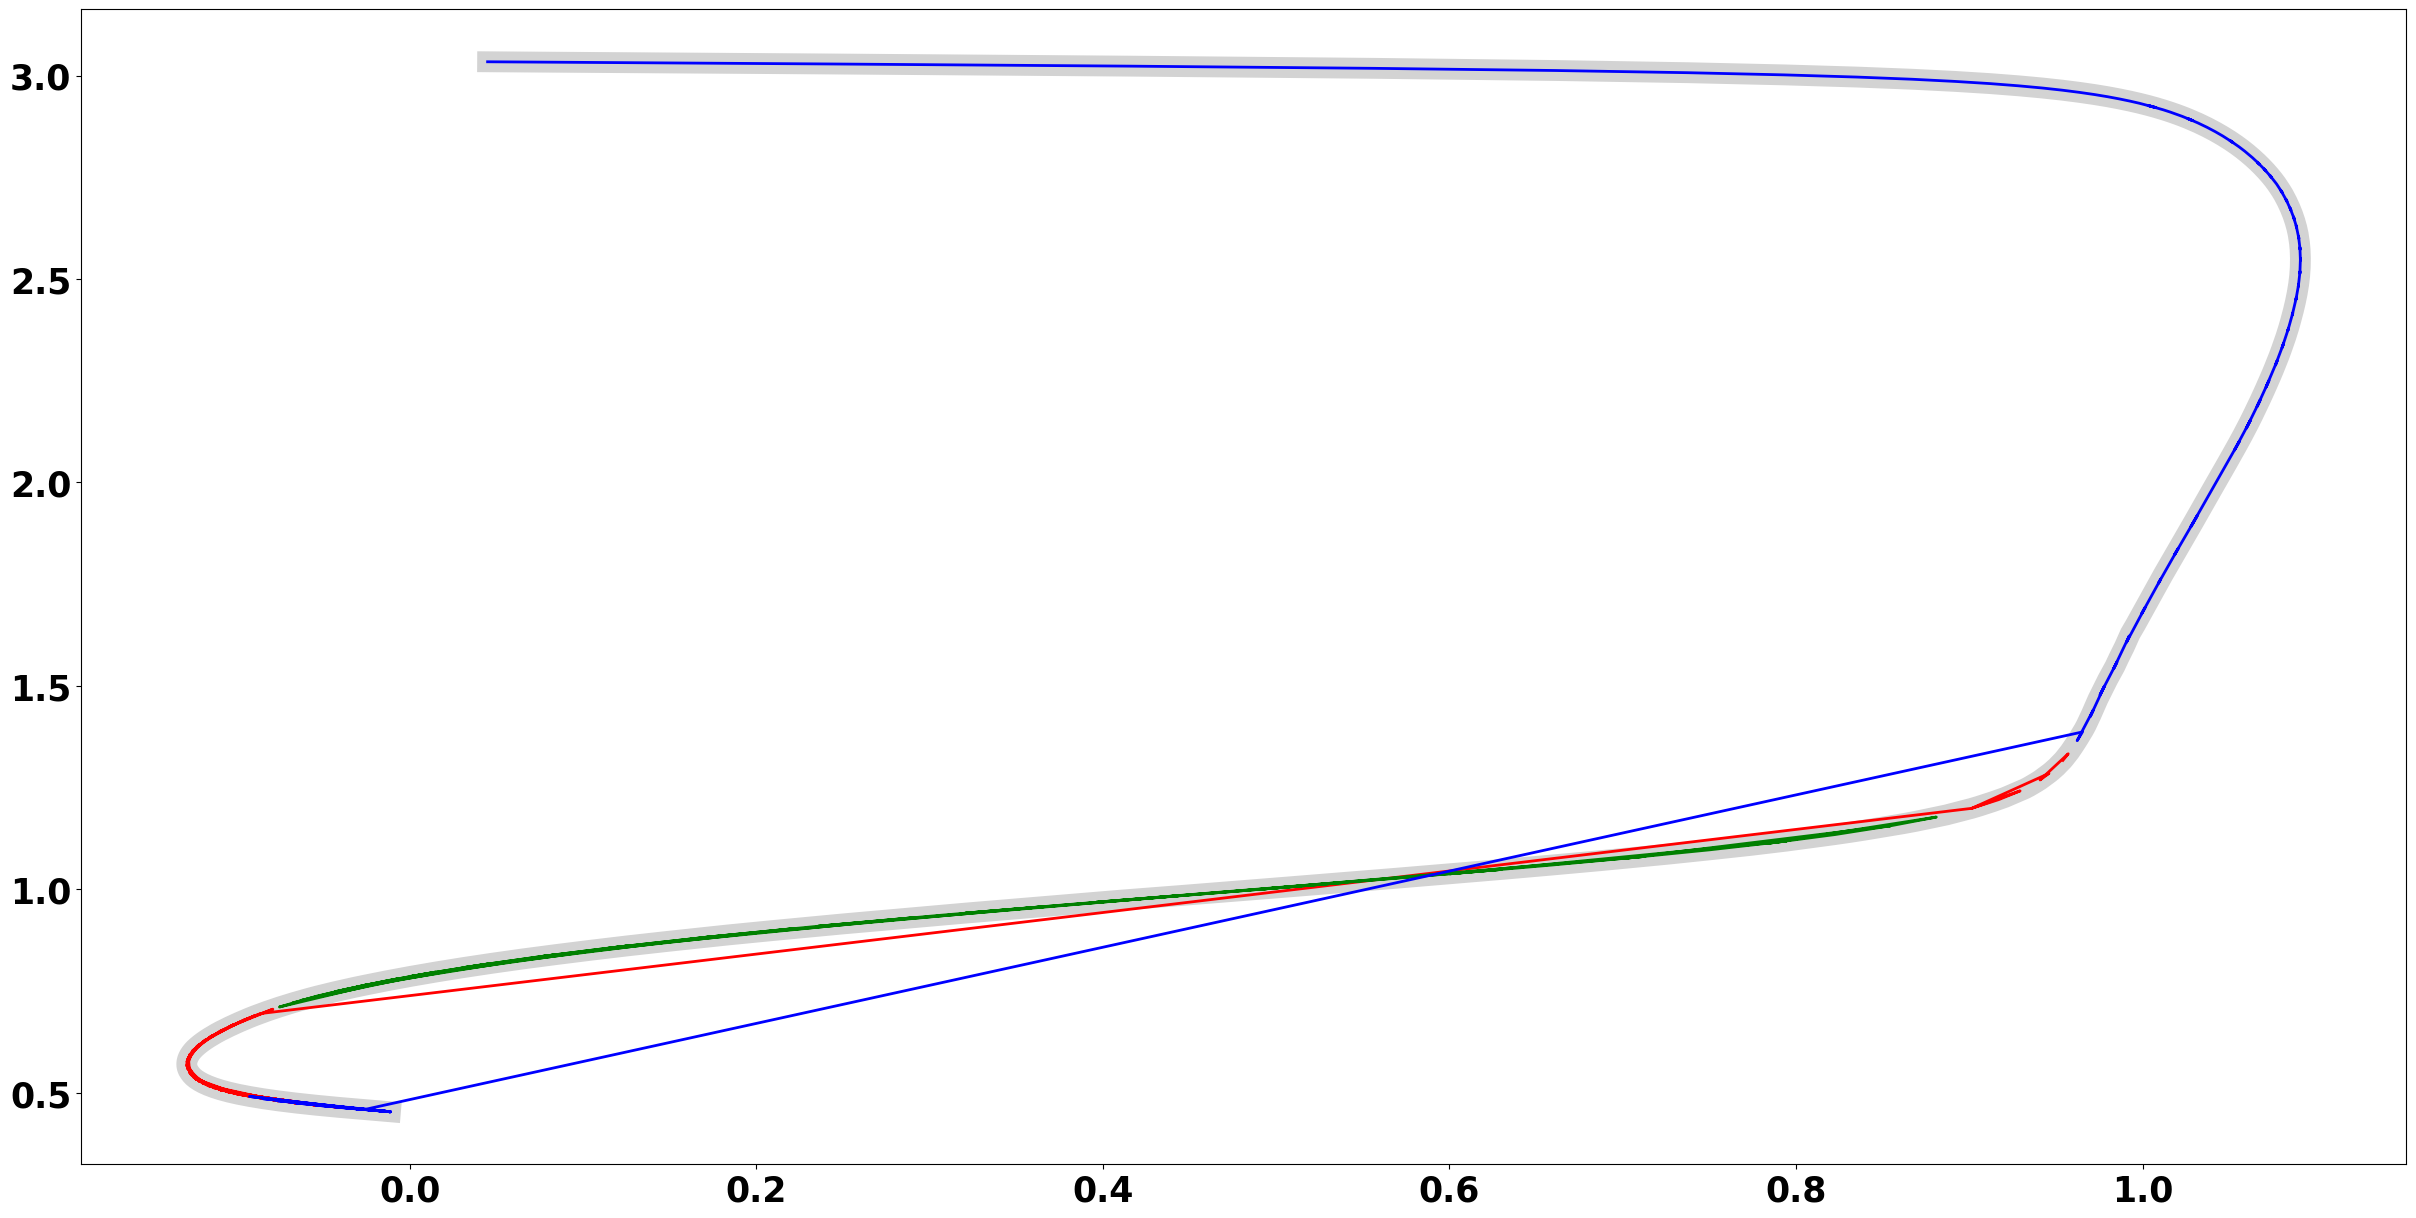

2.0 3
(92,) (92,) (92,) (92,) (92,) (92,) (92,) (92,)
(43,) (43,) (43,) (43,) (43,) (43,) (43,) (43,)
(204,) (204,) (204,) (204,) (204,) (204,) (204,) (204,)


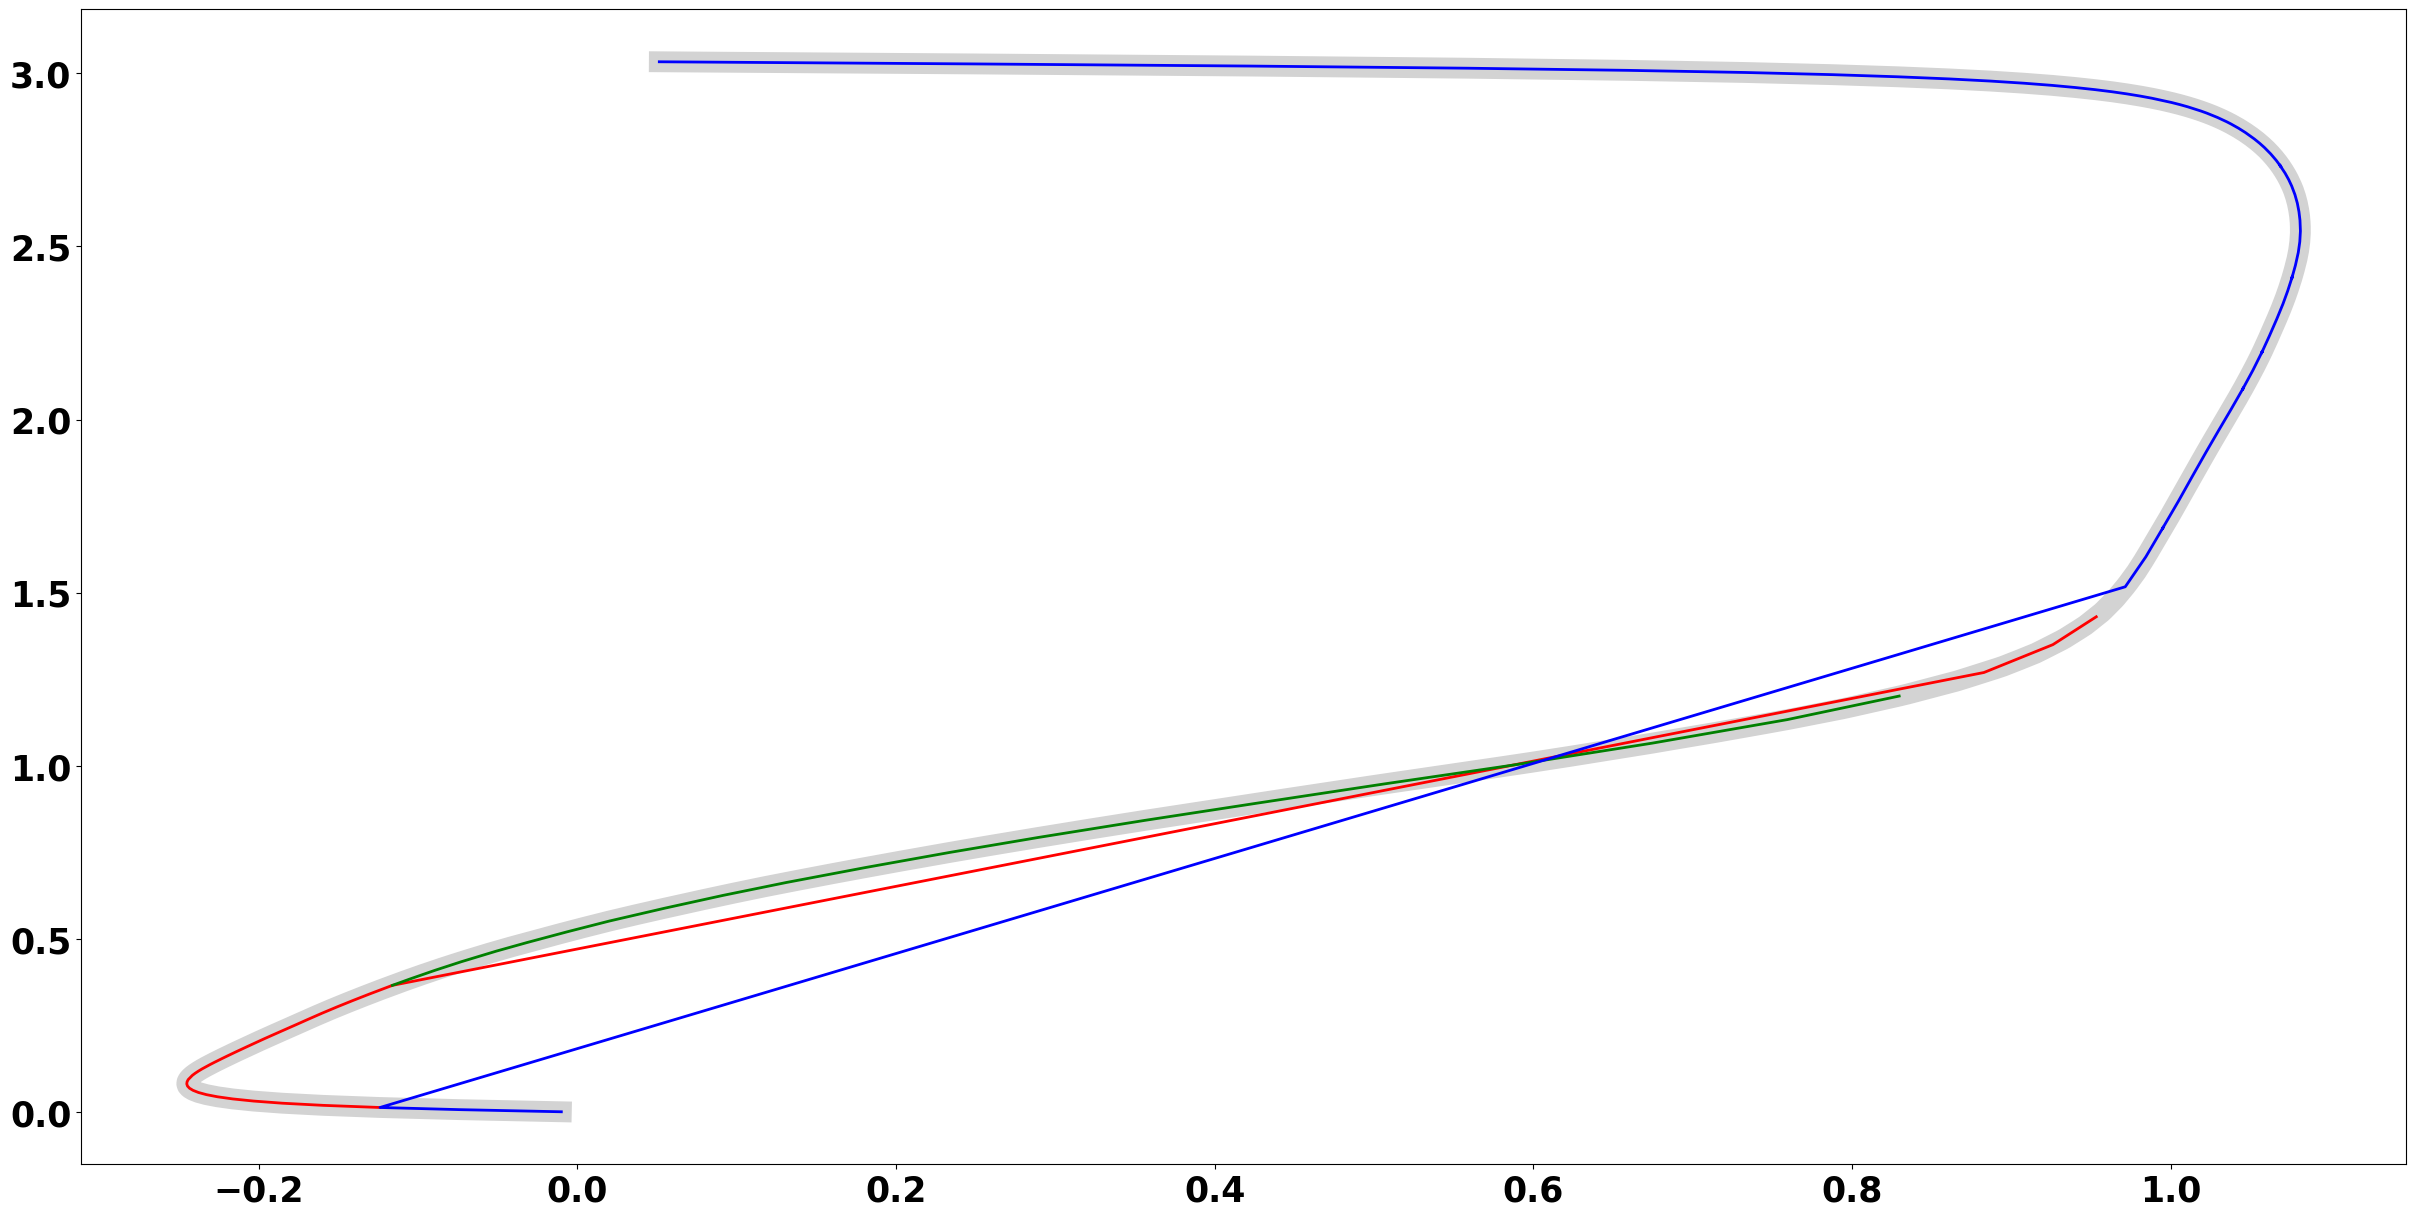

3.0 4
(102,) (102,) (102,) (102,) (102,) (102,) (102,) (102,)
(40,) (40,) (40,) (40,) (40,) (40,) (40,) (40,)
(192,) (192,) (192,) (192,) (192,) (192,) (192,) (192,)


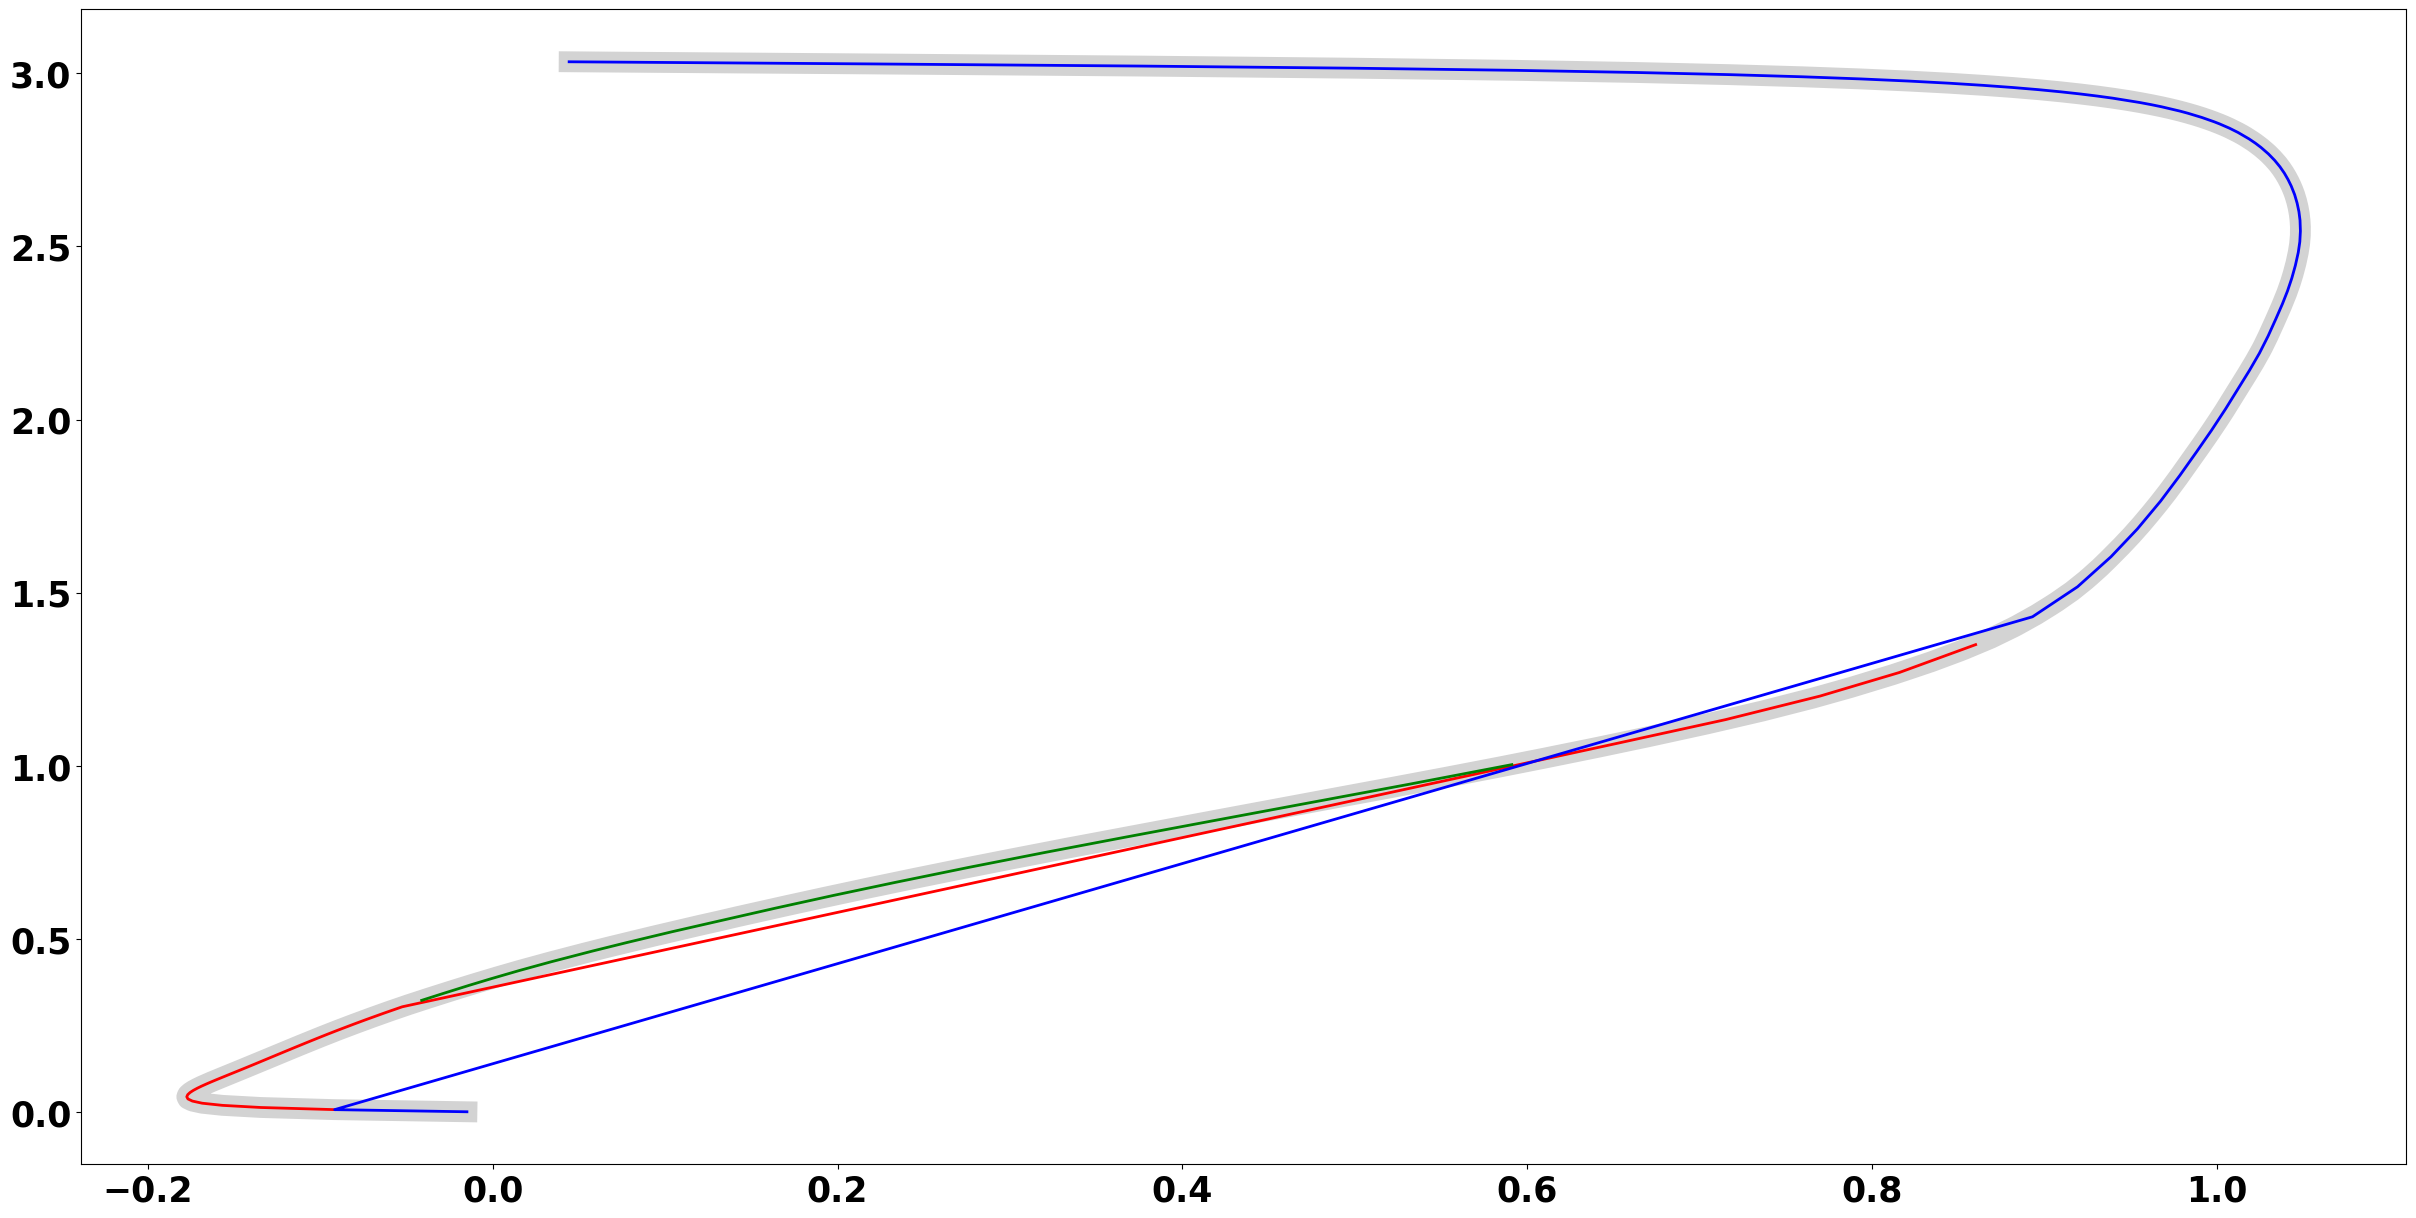

4.0 5
(140,) (140,) (140,) (140,) (140,) (140,) (140,) (140,)
(0,) (0,) (0,) (0,) (0,) (0,) (0,) (0,)
(249,) (249,) (249,) (249,) (249,) (249,) (249,) (249,)


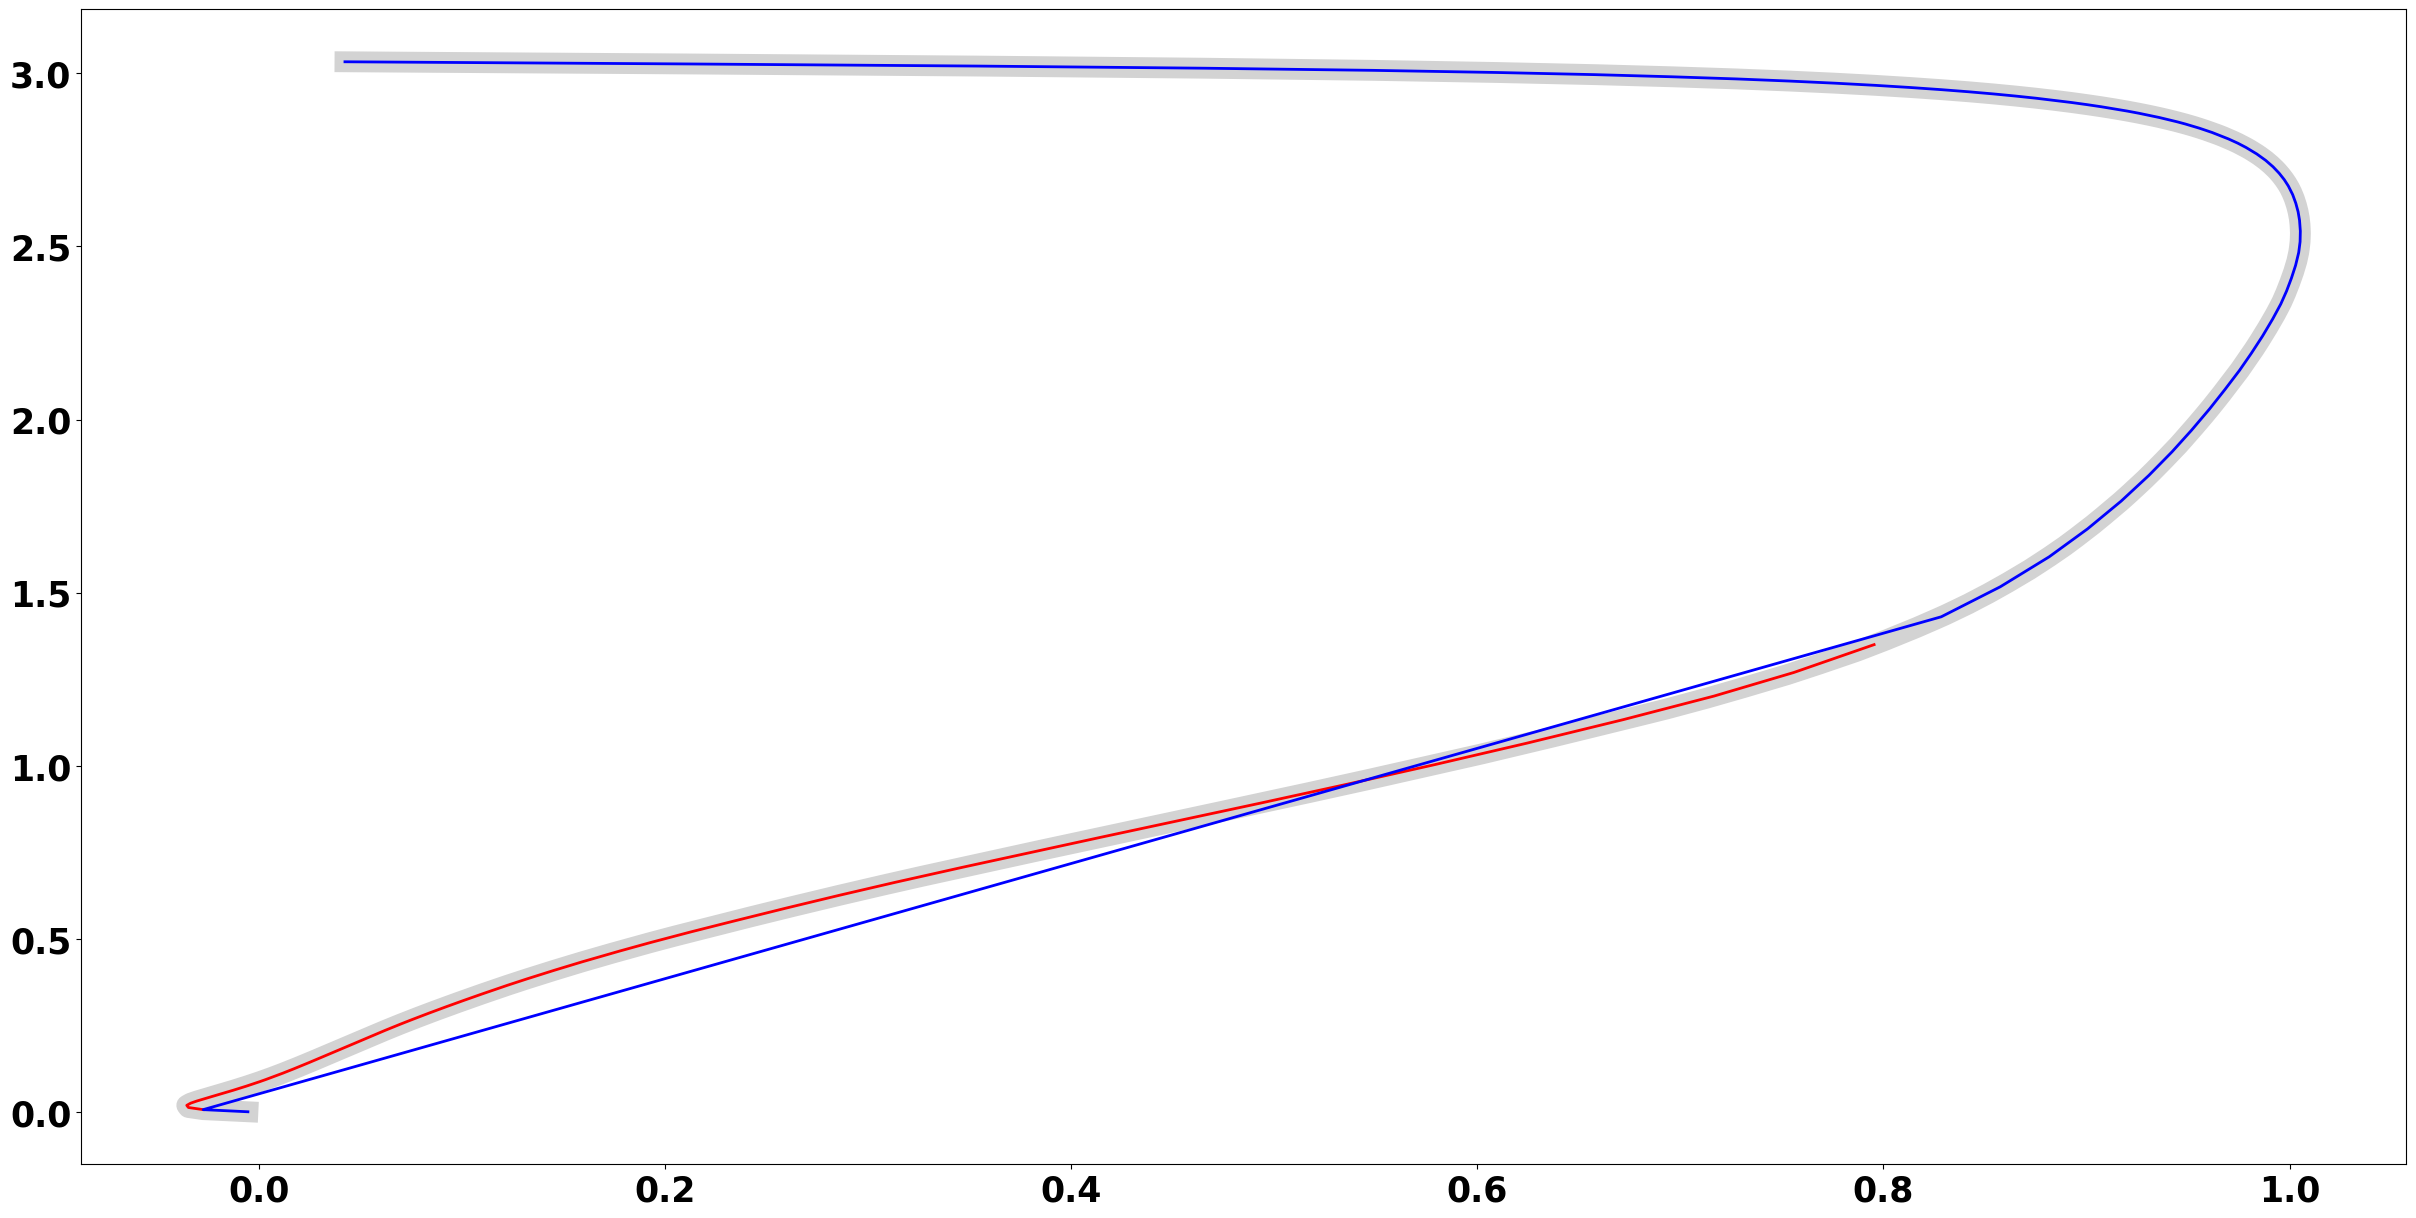

5.0 6
(138,) (138,) (138,) (138,) (138,) (138,) (138,) (138,)
(0,) (0,) (0,) (0,) (0,) (0,) (0,) (0,)
(251,) (251,) (251,) (251,) (251,) (251,) (251,) (251,)


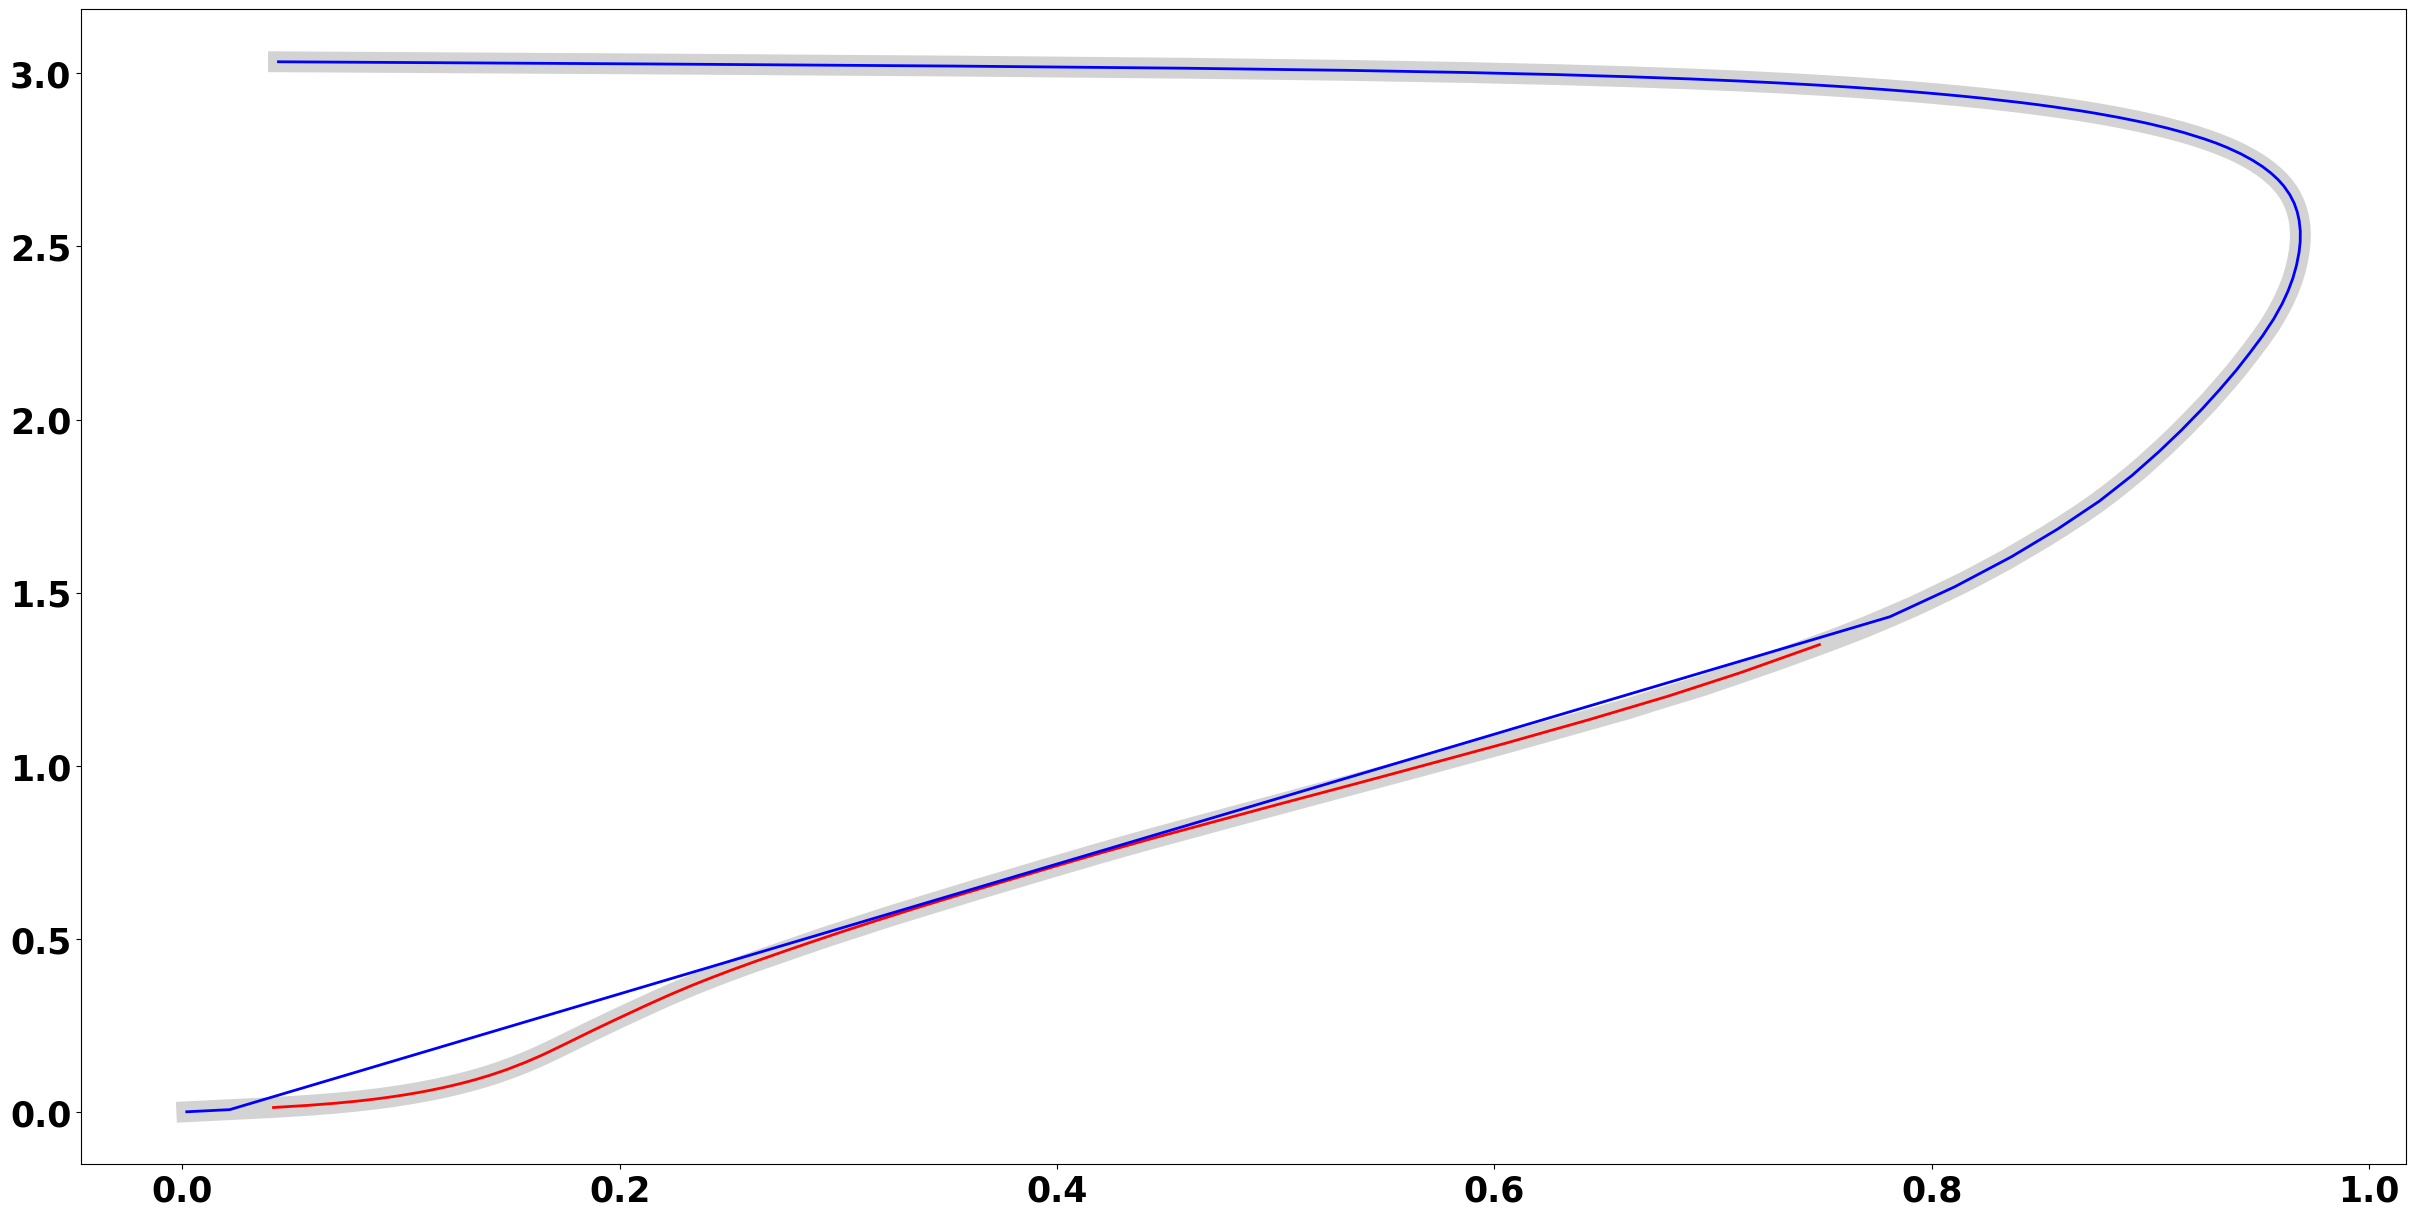

6.0 7
(109,) (109,) (109,) (109,) (109,) (109,) (109,) (109,)
(0,) (0,) (0,) (0,) (0,) (0,) (0,) (0,)
(225,) (225,) (225,) (225,) (225,) (225,) (225,) (225,)


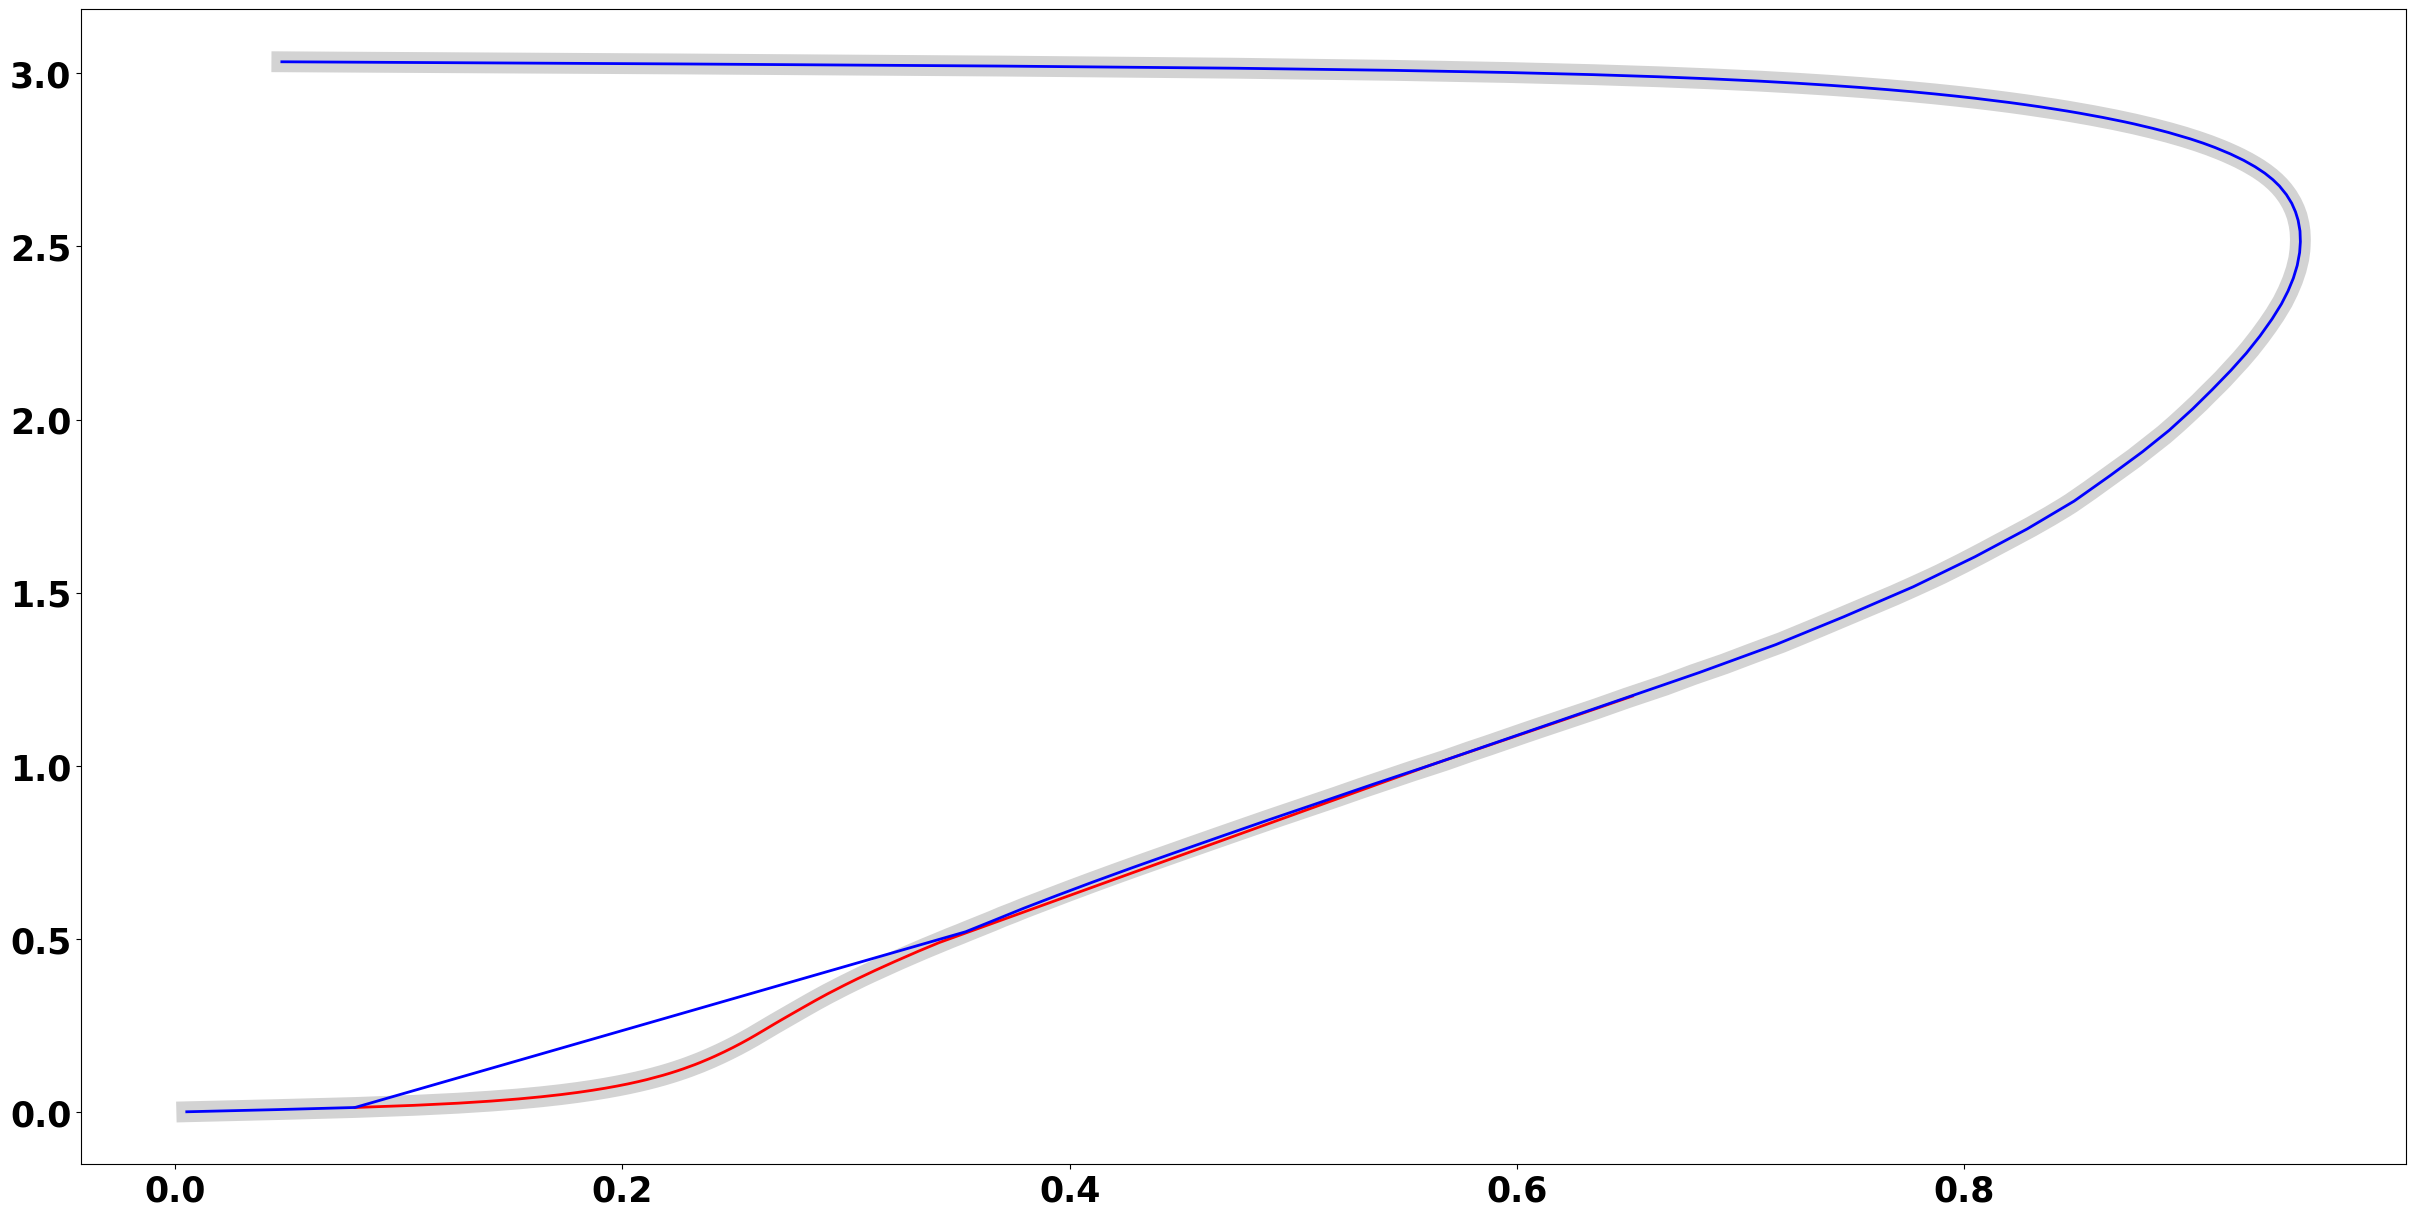

7.0 8
(95,) (95,) (95,) (95,) (95,) (95,) (95,) (95,)
(0,) (0,) (0,) (0,) (0,) (0,) (0,) (0,)
(244,) (244,) (244,) (244,) (244,) (244,) (244,) (244,)


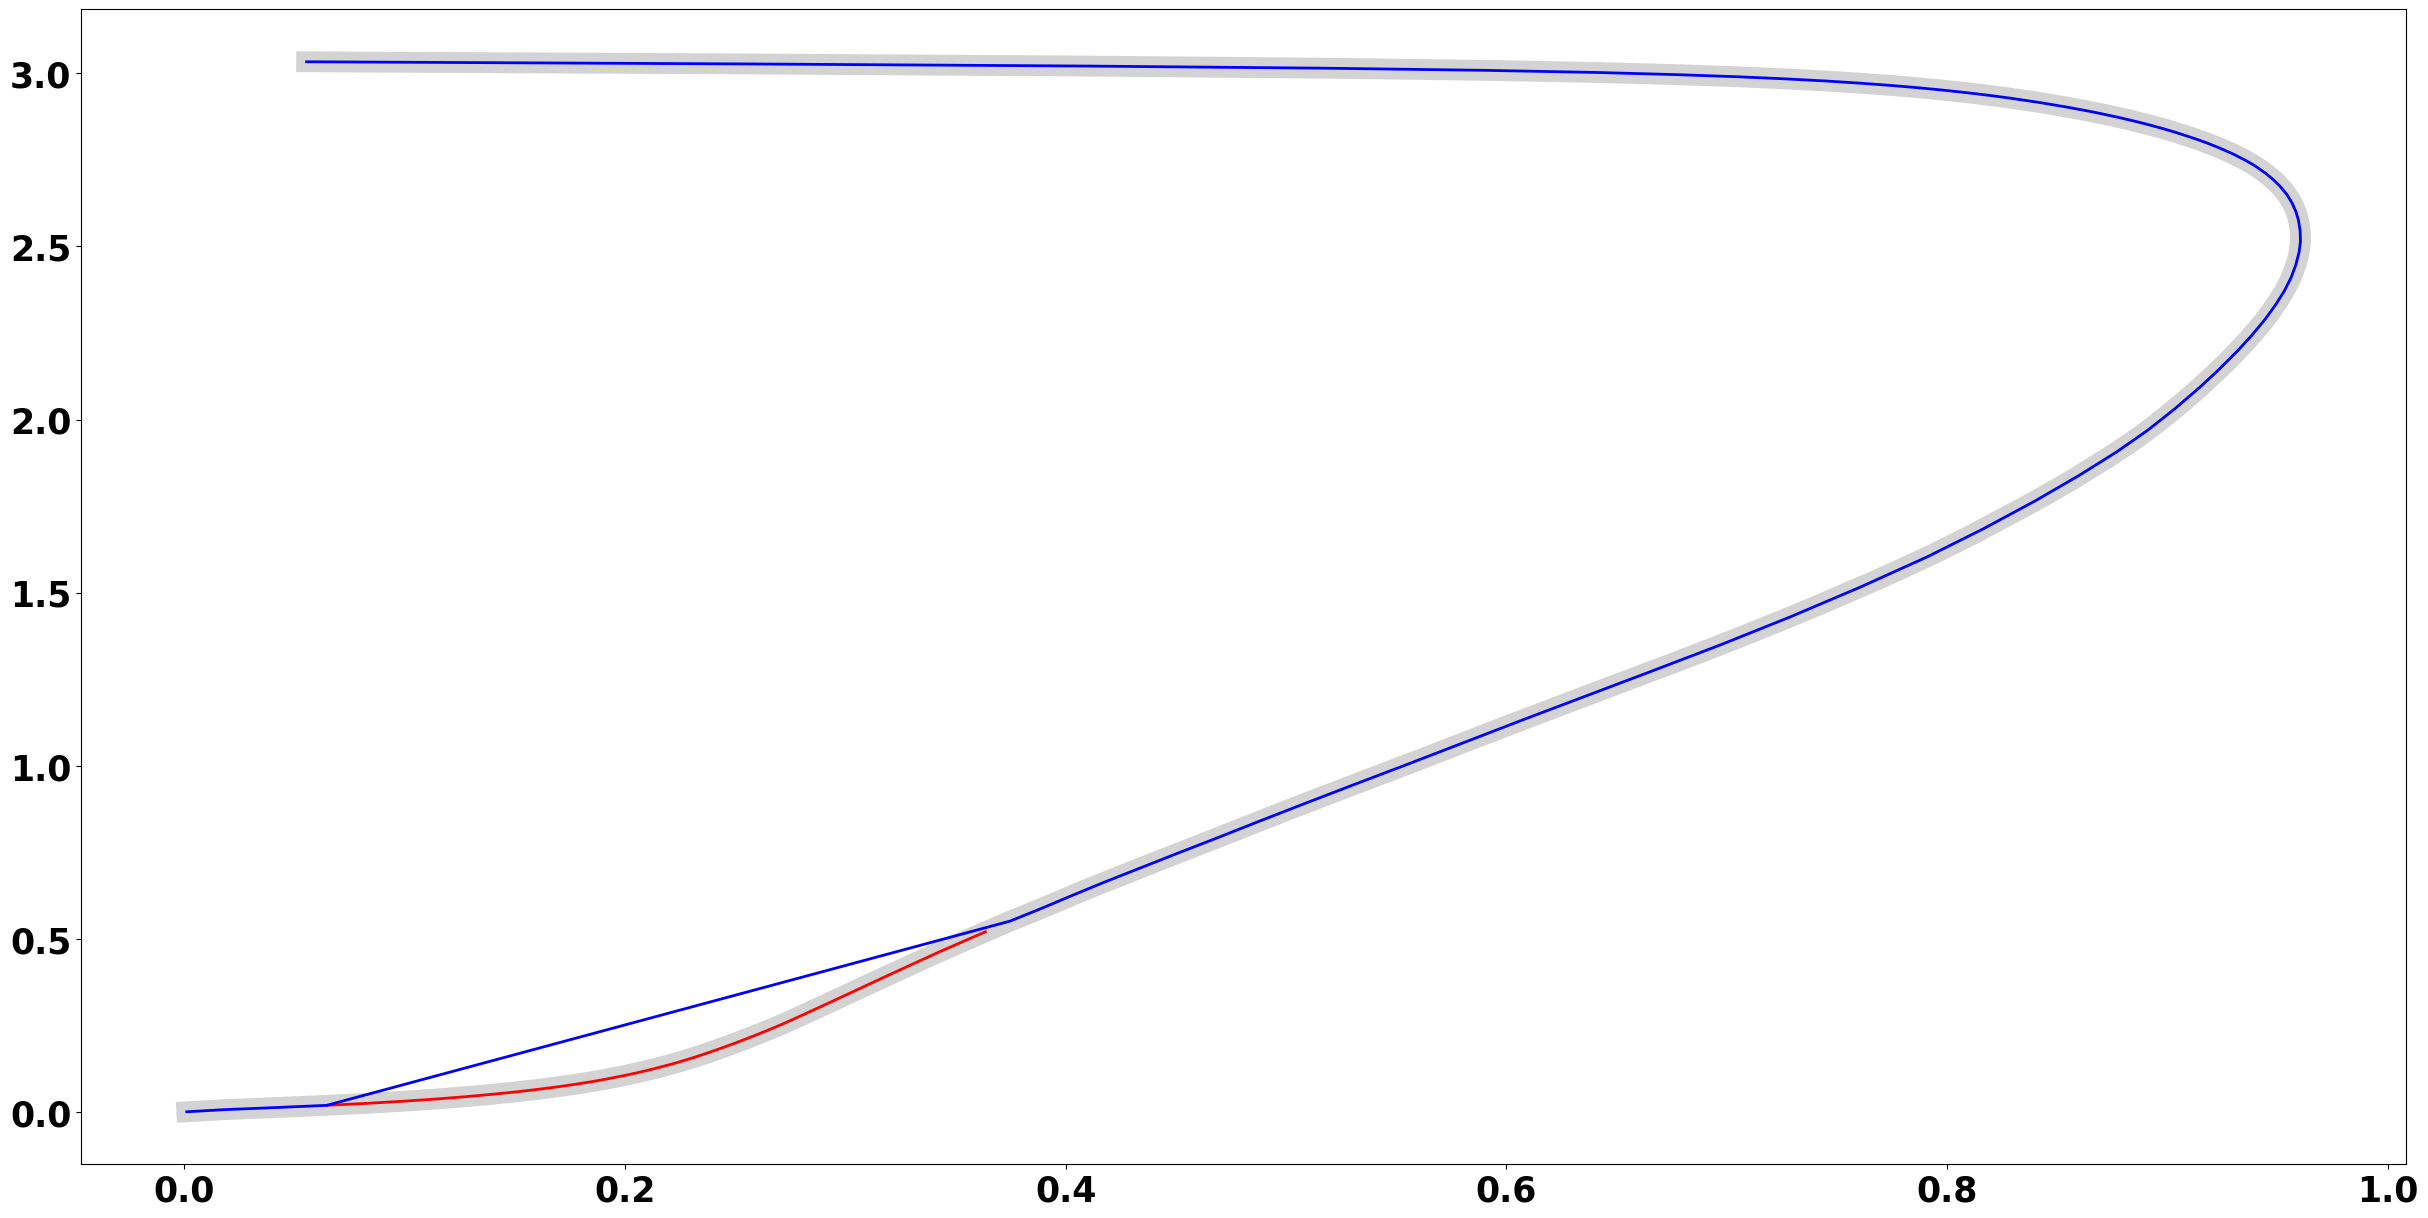

8.0 9
(99,) (99,) (99,) (99,) (99,) (99,) (99,) (99,)
(0,) (0,) (0,) (0,) (0,) (0,) (0,) (0,)
(248,) (248,) (248,) (248,) (248,) (248,) (248,) (248,)


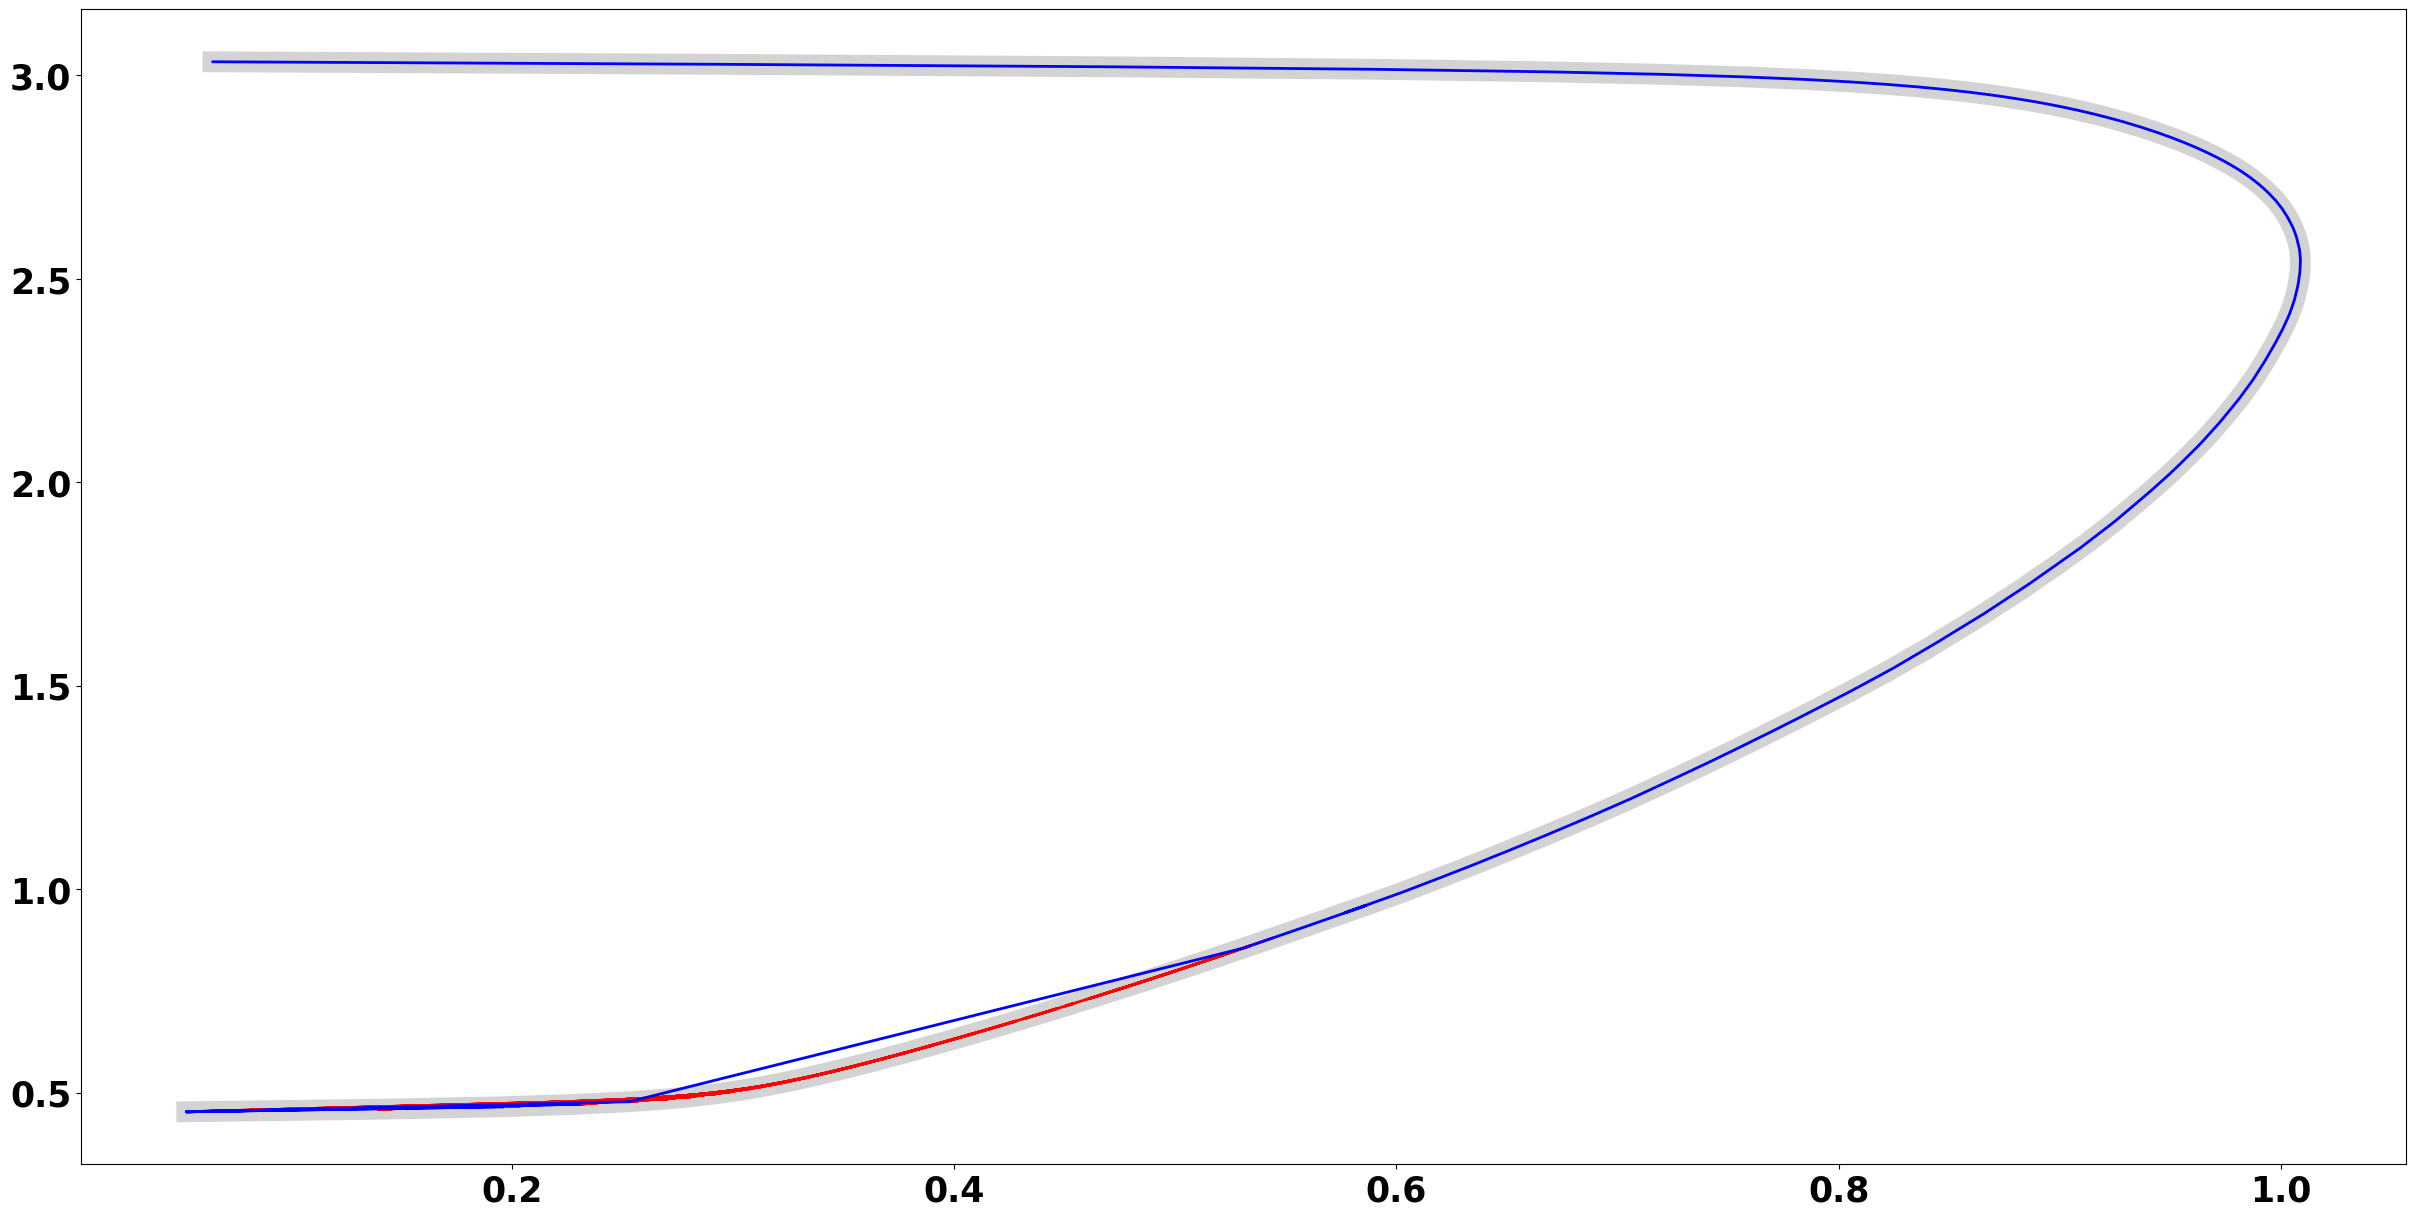

In [201]:
from scipy import interpolate

locations = [0.05, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
 
for l in range(len(REF)):

    loc = locations[l]
    
    x  = loc*np.ones(REF[l][:,0].shape)
    
    y  = REF[l][:,0]
    u  = REF[l][:,1]
    v  = REF[l][:,2]
    uu = REF[l][:,3]
    vv = REF[l][:,4]
    uv = REF[l][:,5]
    k  = REF[l][:,6]
    
    fu  = interpolate.interp1d(y,u, bounds_error=None, fill_value="extrapolate", assume_sorted=False)
    fv  = interpolate.interp1d(y,v, bounds_error=None, fill_value="extrapolate", assume_sorted=False)
    fuu = interpolate.interp1d(y,uu,bounds_error=None, fill_value="extrapolate", assume_sorted=False)
    fvv = interpolate.interp1d(y,vv,bounds_error=None, fill_value="extrapolate", assume_sorted=False)
    fuv = interpolate.interp1d(y,uv,bounds_error=None, fill_value="extrapolate", assume_sorted=False)
    fk  = interpolate.interp1d(y,k, bounds_error=None, fill_value="extrapolate", assume_sorted=False)

    print(loc,l)
    
    C0 = c0[c0['X']==loc]
    C1 = c1[c1['X']==loc]
    C2 = c2[c2['X']==loc]
    
    x0 = C0['X']
    x1 = C1['X']
    x2 = C2['X']
    
    y0 = C0['Y']
    y1 = C1['Y']
    y2 = C2['Y']
    
    z0 = np.zeros(x0.shape)
    z1 = np.zeros(x1.shape)
    z2 = np.zeros(x2.shape)
        
    U0  = fu(y0)
    V0  = fv(y0)
    UU0 = fuu(y0)
    VV0 = fvv(y0)
    UV0 = fuv(y0)
    K0  = fk(y0)
        
    U1  = fu(y1)
    V1  = fv(y1)
    UU1 = fuu(y1)
    VV1 = fvv(y1)
    UV1 = fuv(y1)
    K1  = fk(y1)
    
    U2  = fu(y2)
    V2  = fv(y2)
    UU2 = fuu(y2)
    VV2 = fvv(y2)
    UV2 = fuv(y2)
    K2  = fk(y2)
    
    print(x0.shape, y0.shape, U0.shape, V0.shape, UU0.shape, VV0.shape, UV0.shape, K0.shape)
    print(x1.shape, y1.shape, U1.shape, V1.shape, UU1.shape, VV1.shape, UV1.shape, K1.shape)
    print(x2.shape, y2.shape, U2.shape, V2.shape, UU2.shape, VV2.shape, UV2.shape, K2.shape)
    
    data0 = np.transpose(np.vstack([x0, y0, z0, U0, V0, UU0, VV0, UV0, K0]))
    data1 = np.transpose(np.vstack([x1, y1, z1, U1, V1, UU1, VV1, UV1, K1]))
    data2 = np.transpose(np.vstack([x2, y2, z2, U2, V2, UU2, VV2, UV2, K2]))
    
    np.savetxt('X'+str(loc)+'_c0.txt', data0)
    np.savetxt('X'+str(loc)+'_c1.txt', data1)
    np.savetxt('X'+str(loc)+'_c2.txt', data2)
    
    #file1 = 'X'+str(loc)+'_c0.txt'
    #
    #!awk '{ print $1,$2,$3 }' < file1 > 'tmp'
    #
    #!sed 's/\(.*\)/\(\1\)/' 'tmp' > 'out'

    plt.figure(figsize=(30,15), frameon=False)

    plt.plot(u, y, marker='.', c='lightgray', linewidth=15)
    plt.plot(U0, y0, '-', c='r', linewidth=2)
    plt.plot(U1, y1, '-', c='g', linewidth=2)
    plt.plot(U2, y2, '-', c='b', linewidth=2)
    plt.show()

In [193]:
!awk '{ print $1,$2,$3 }' < X2.0_c2.txt > outfile2

!sed 's/\(.*\)/\(\1\)/' outfile2 > outfile3

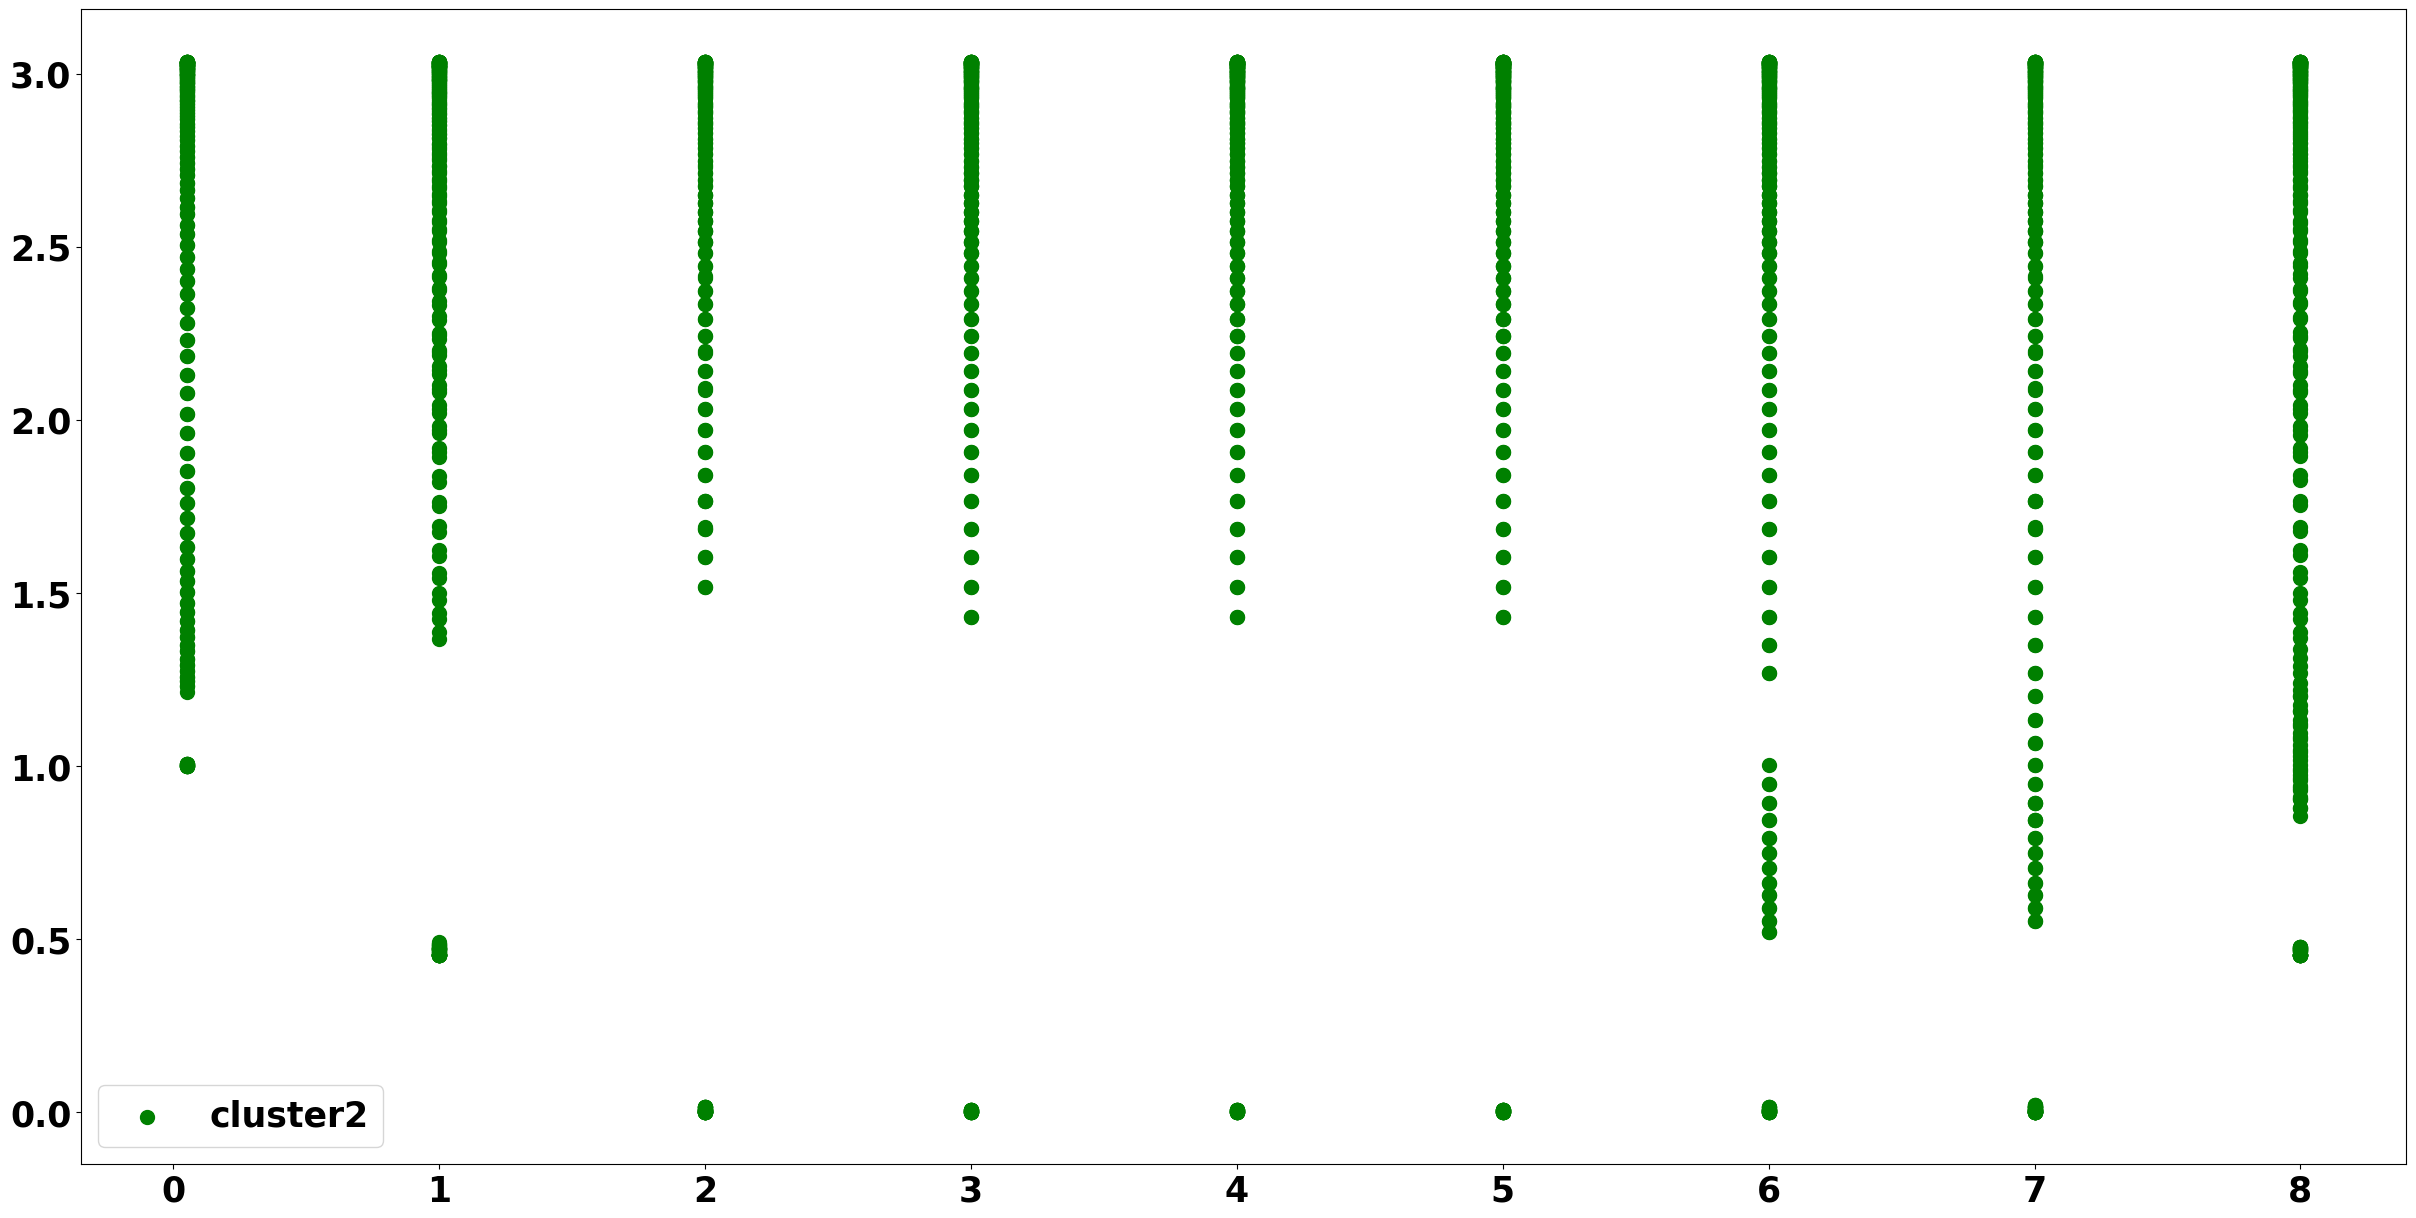

In [113]:
indicies0 = np.loadtxt('X'+str(l)+'_c0.index').astype(int)
indicies1 = np.loadtxt('X'+str(l)+'_c1.index').astype(int)
indicies2 = np.loadtxt('X'+str(l)+'_c2.index').astype(int)

plt.figure(figsize=(30,15), frameon=False)

#plt.scatter(c0['X'], c0['Y'],                      s=100, c='b', marker='o', label='cluster0')
#plt.scatter(c1['X'], c1['Y'],                      s=100, c='r', marker='o', label='cluster1')
plt.scatter(c2['X'], c2['Y'],                      s=100, c='g', marker='o', label='cluster2')

#plt.scatter(0.05*np.ones(REF[0][:,0].shape), REF[0][:,0], s=100, c='y', marker=".")

#plt.scatter(0.05*np.ones(REF[0][indicies0,0].shape), REF[0][indicies0,0], s=50, c='k', marker="o")
#plt.scatter(0.05*np.ones(REF[0][indicies1,0].shape), REF[0][indicies1,0], s=50, c='g', marker="o")
#plt.scatter(0.05*np.ones(REF[0][indicies2,0].shape), REF[0][indicies2,0], s=50, c='r', marker="o")

#plt.scatter(0.5*np.ones(REF[1][indicies2,0].shape), REF[1][indicies2,0], s=50, c='r', marker="o")
#plt.scatter(1*np.ones(REF[2][indicies2,0].shape), REF[2][indicies2,0], s=50, c='r', marker="o")
#plt.scatter(2*np.ones(REF[3][indicies2,0].shape), REF[3][indicies2,0], s=50, c='r', marker="o")

#plt.scatter(loc*np.ones(data0.shape[0]), data0[:,0], s=100, c='b', marker="_")
#plt.scatter(loc*np.ones(data1.shape[0]), data1[:,0], s=100, c='r', marker="_")
#plt.scatter(loc*np.ones(data2.shape[0]), data2[:,0], s=100, c='g', marker="_")

plt.legend()
plt.show()
plt.close()

467 (44, 7)
467 (18, 7)
467 (231, 7)


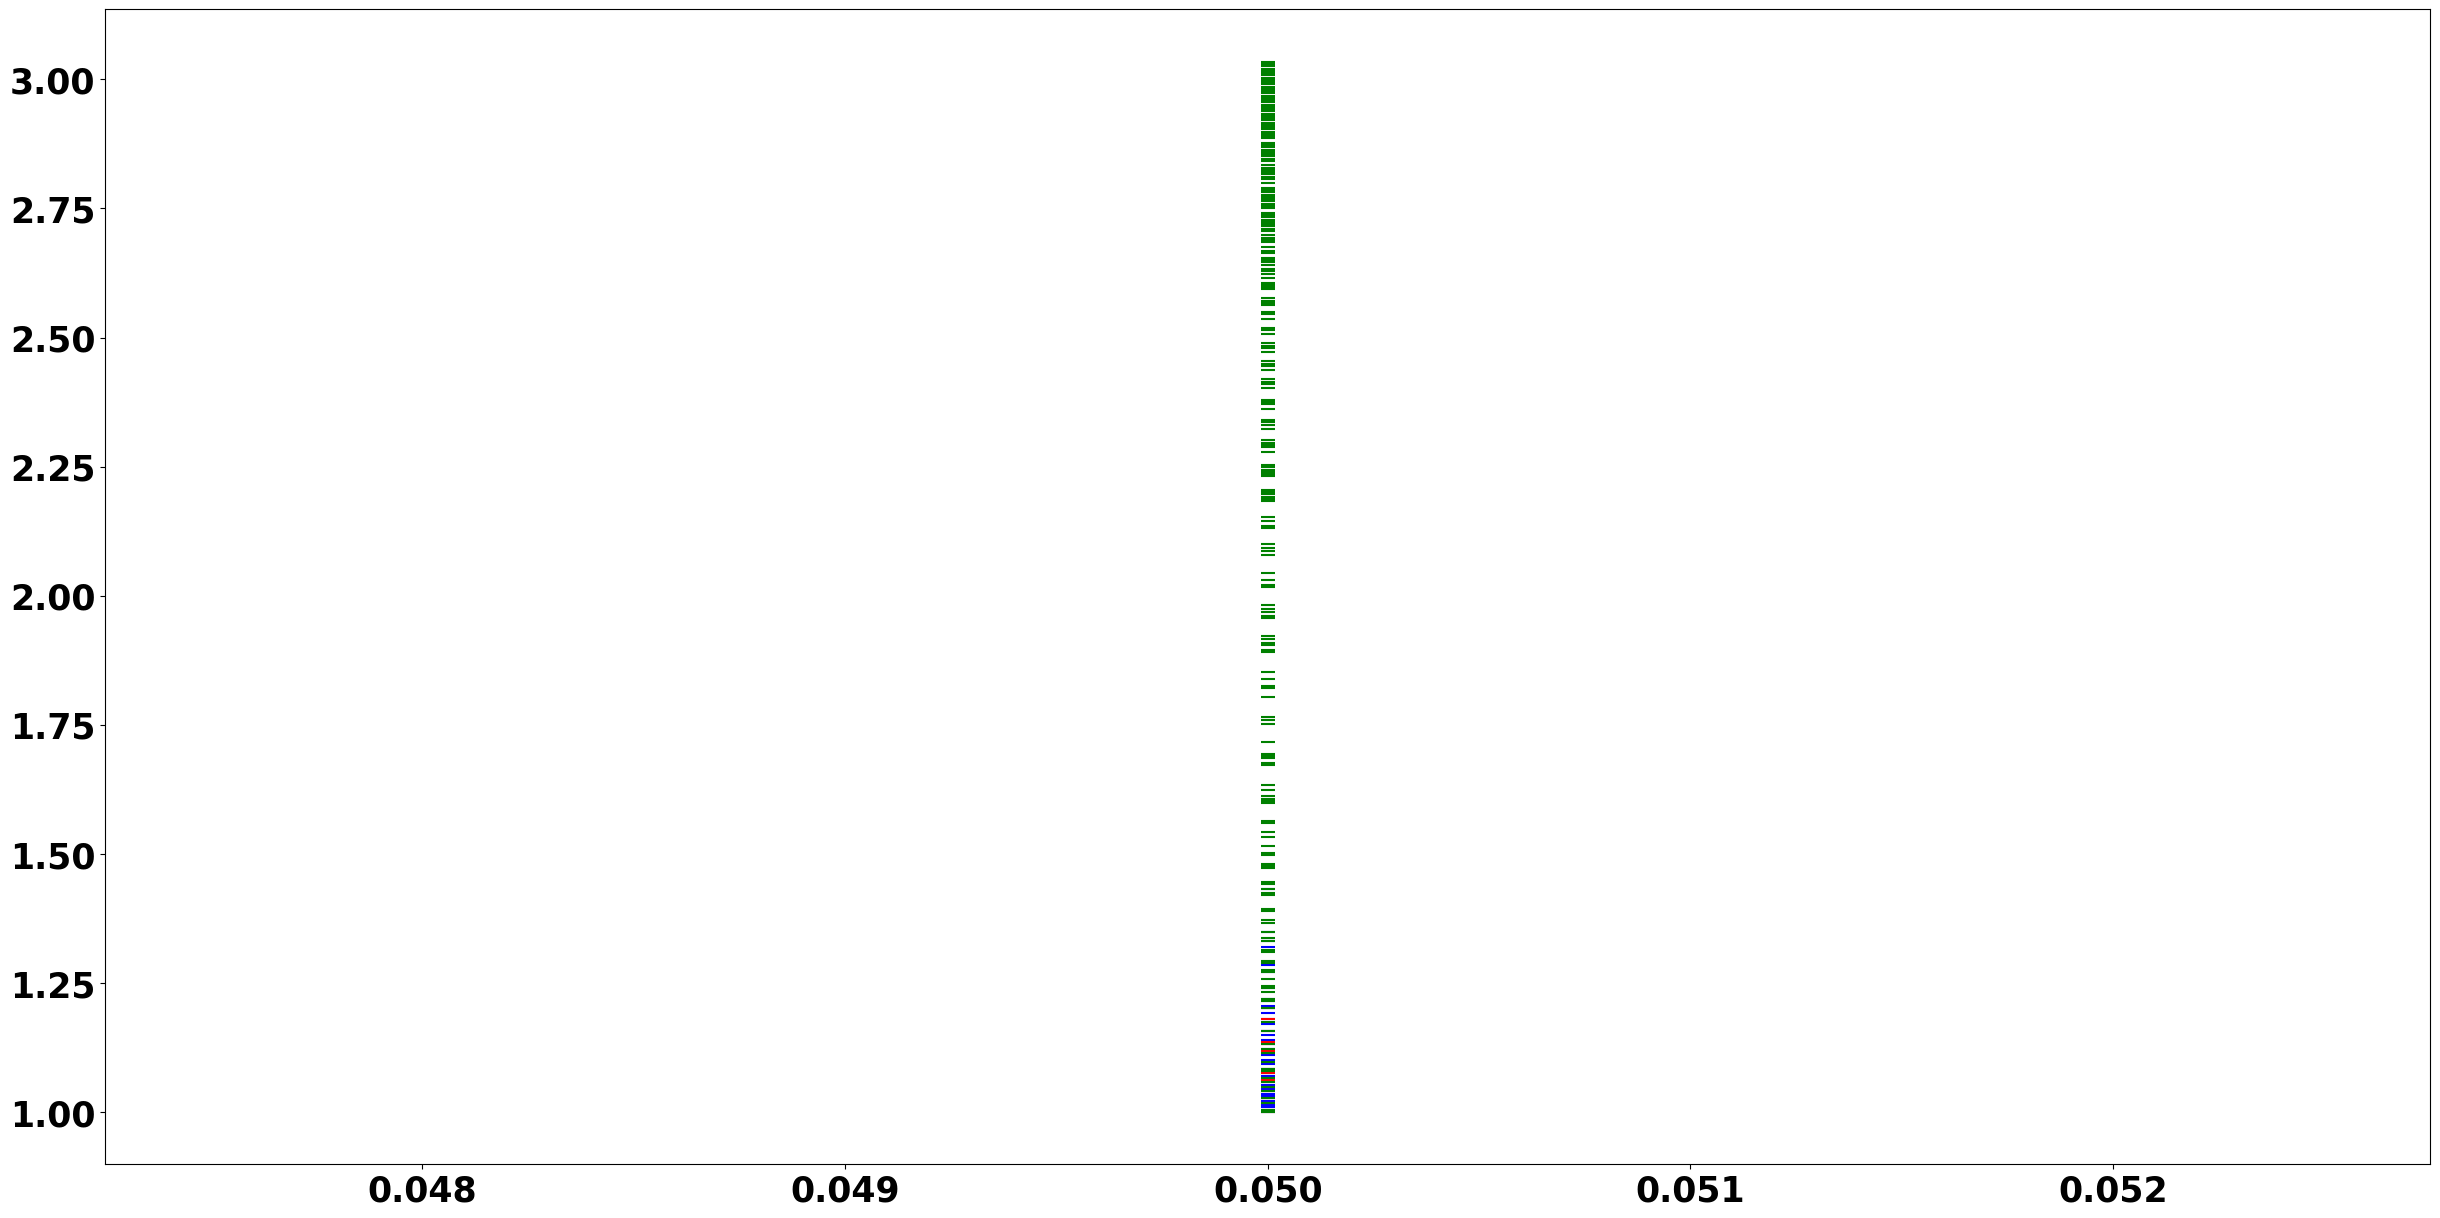

457 (46, 7)
457 (31, 7)
457 (234, 7)


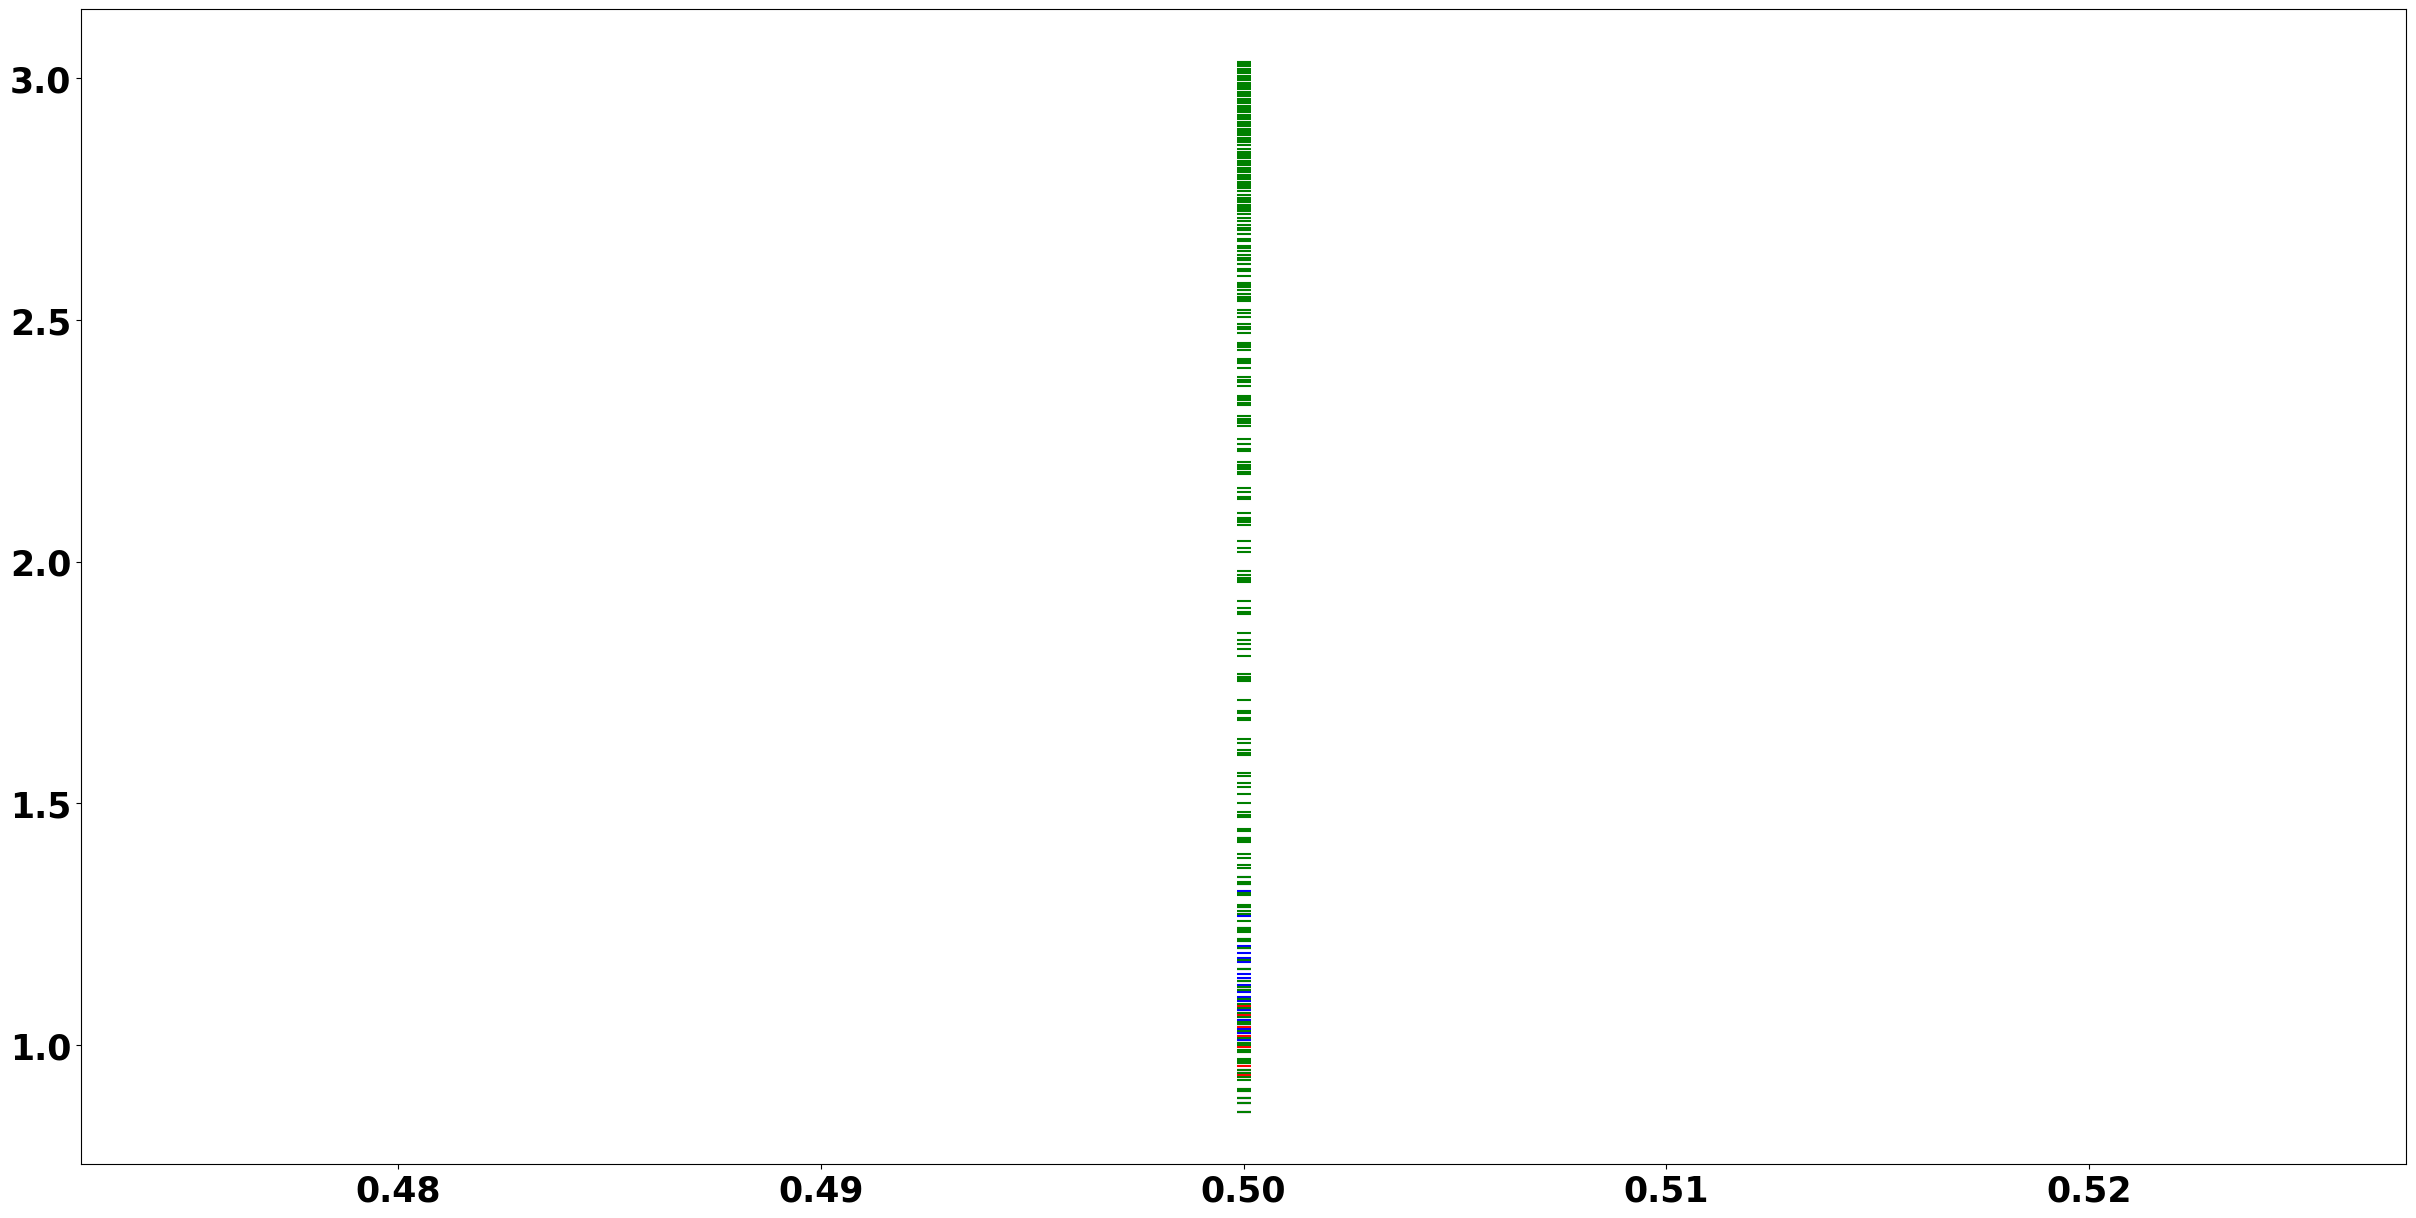

482 (107, 7)
482 (59, 7)
482 (239, 7)


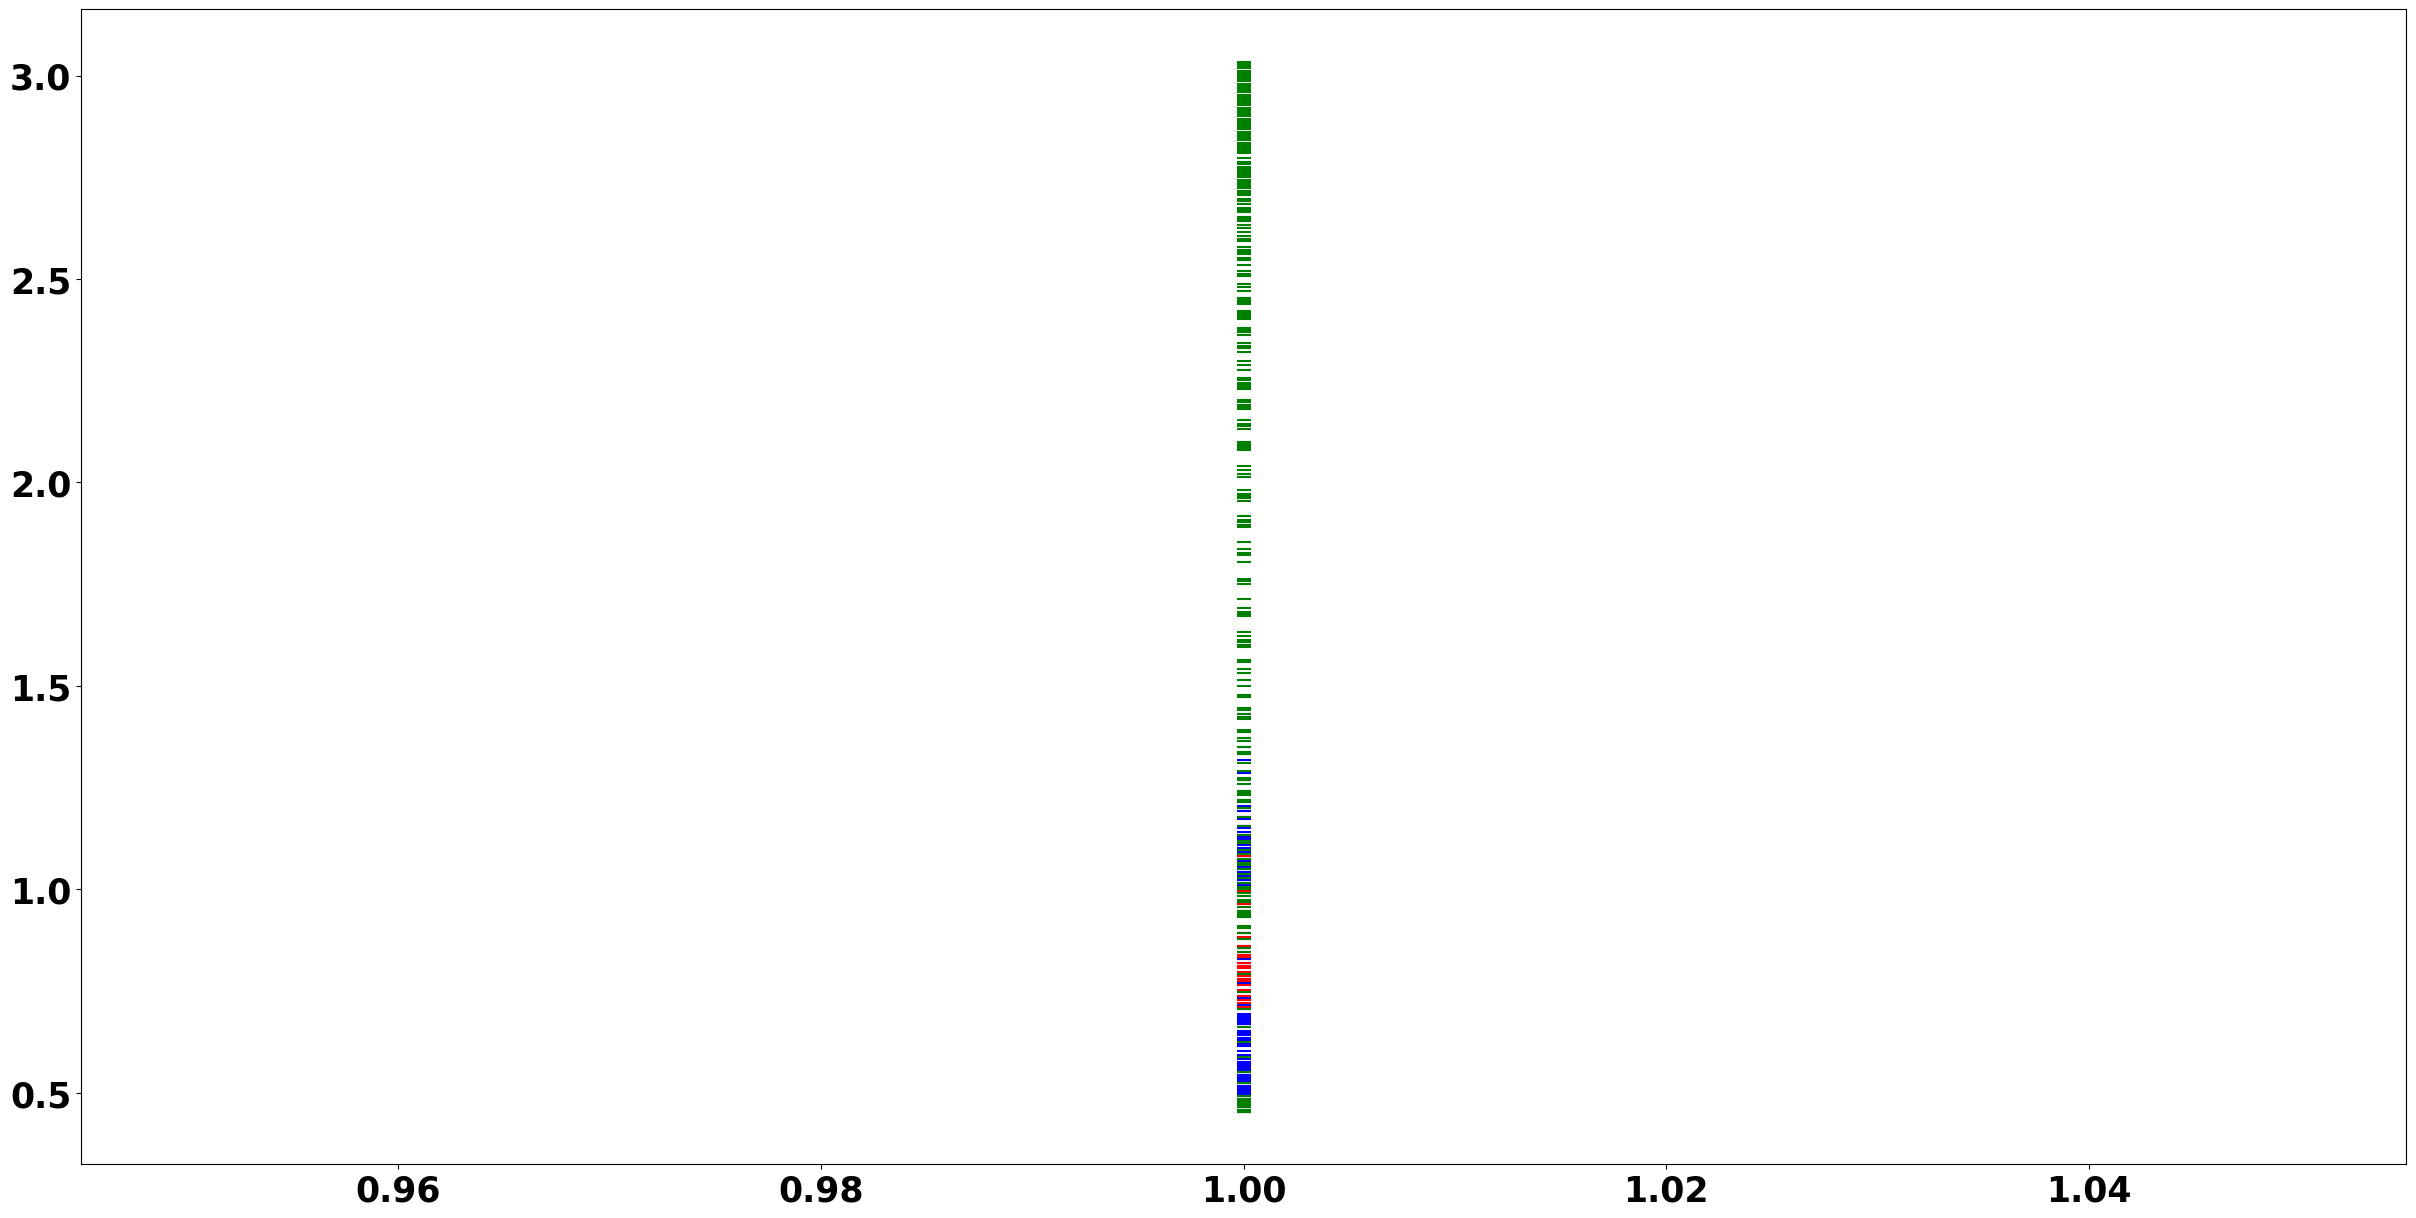

491 (138, 7)
491 (61, 7)
491 (223, 7)


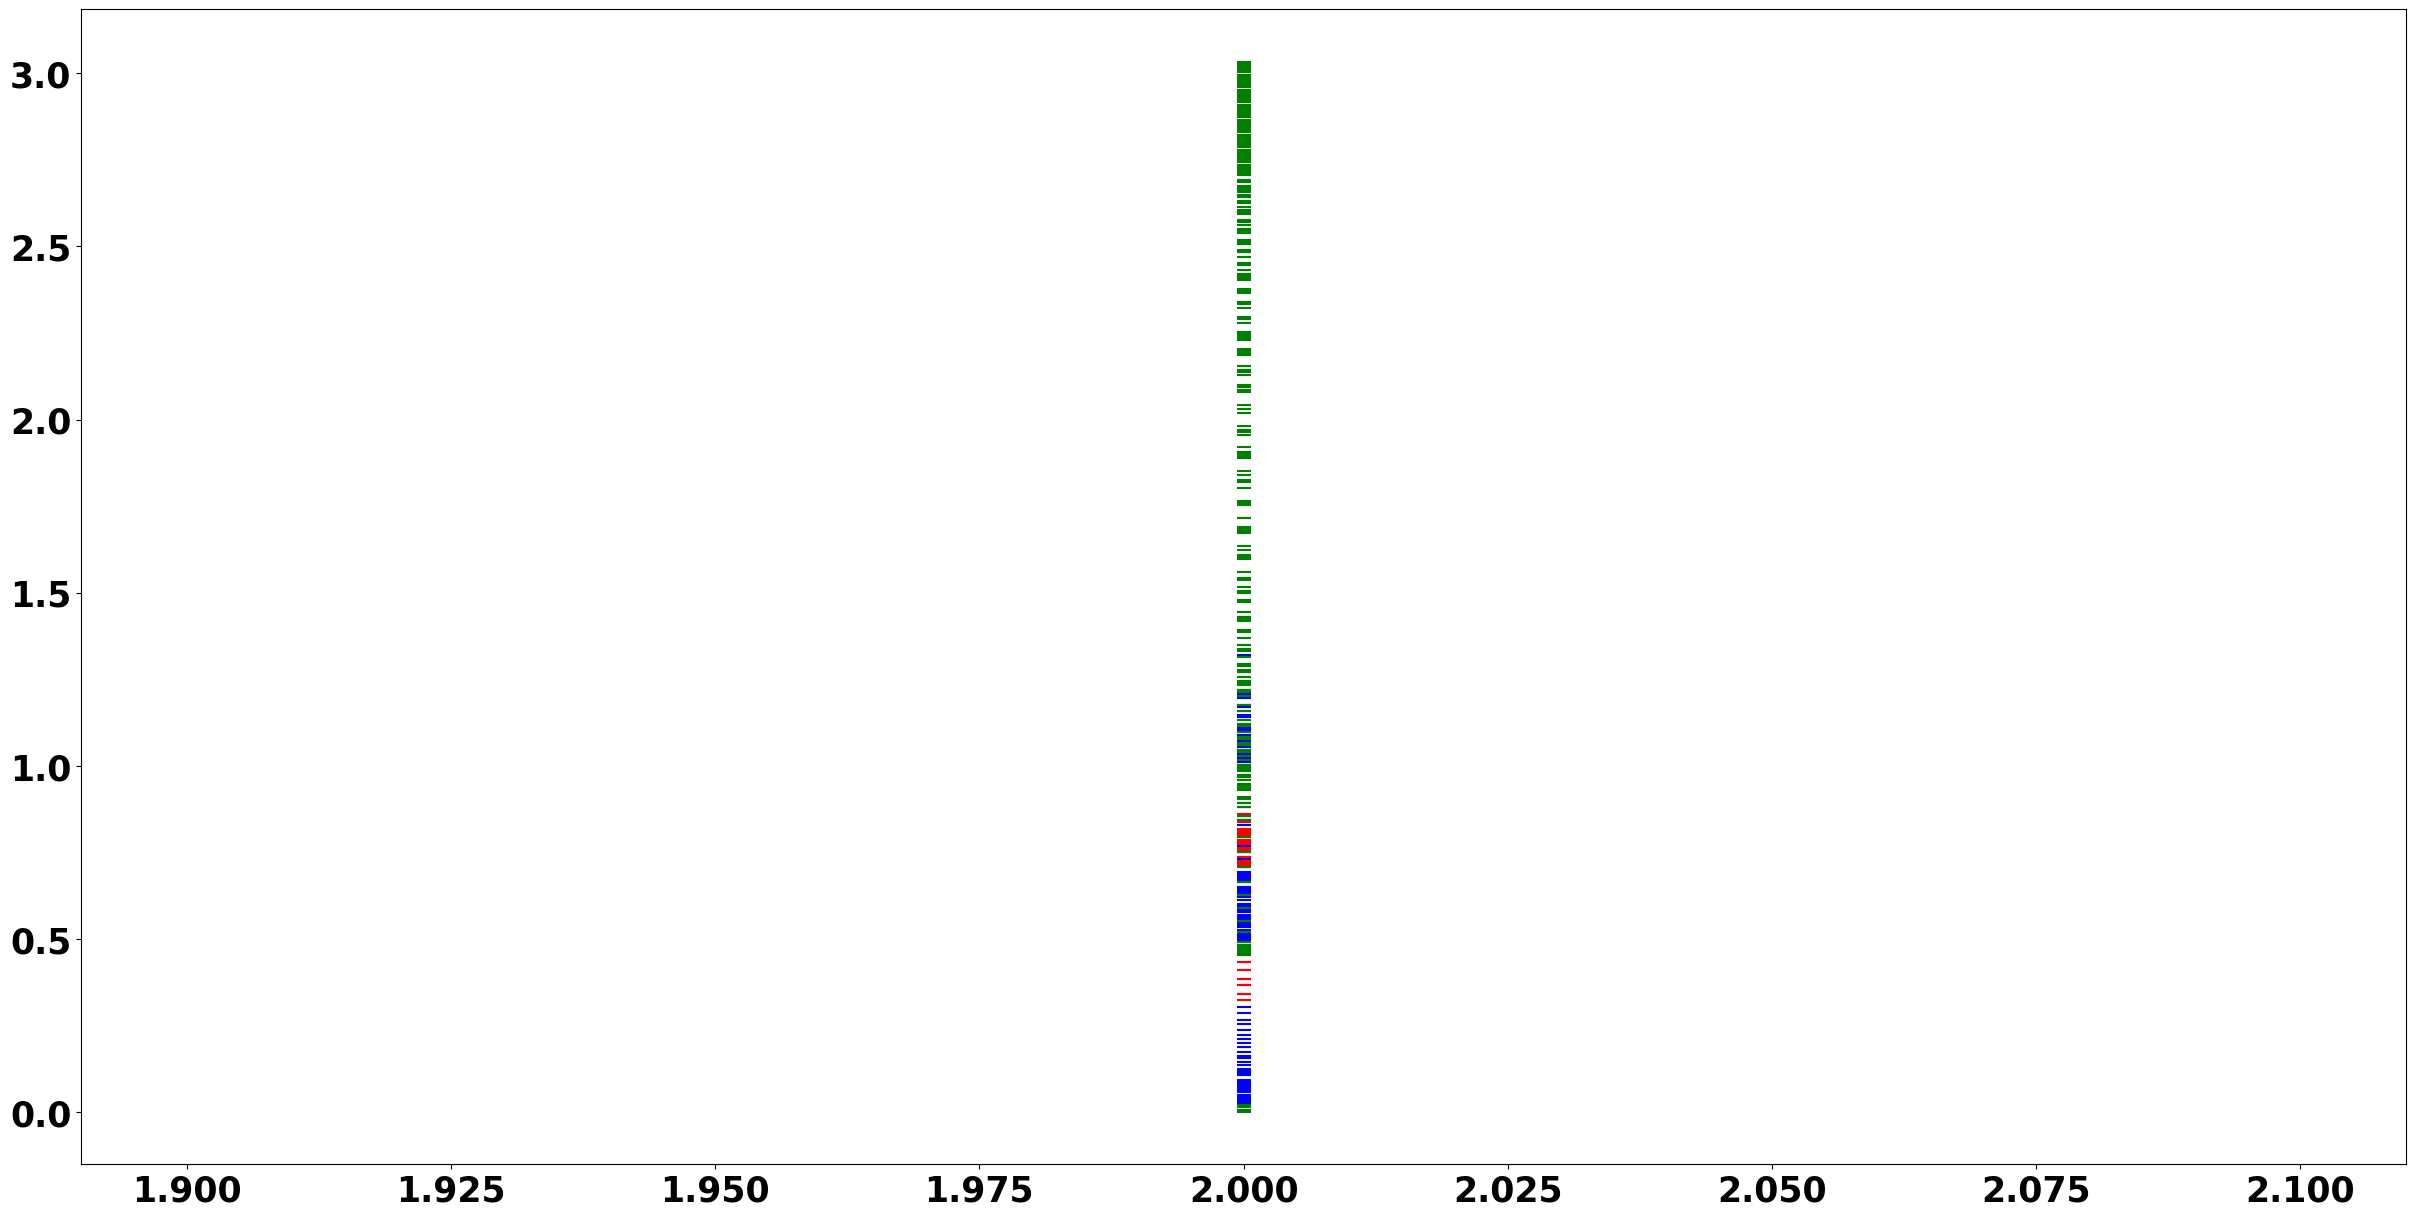

491 (138, 7)
491 (61, 7)
491 (223, 7)


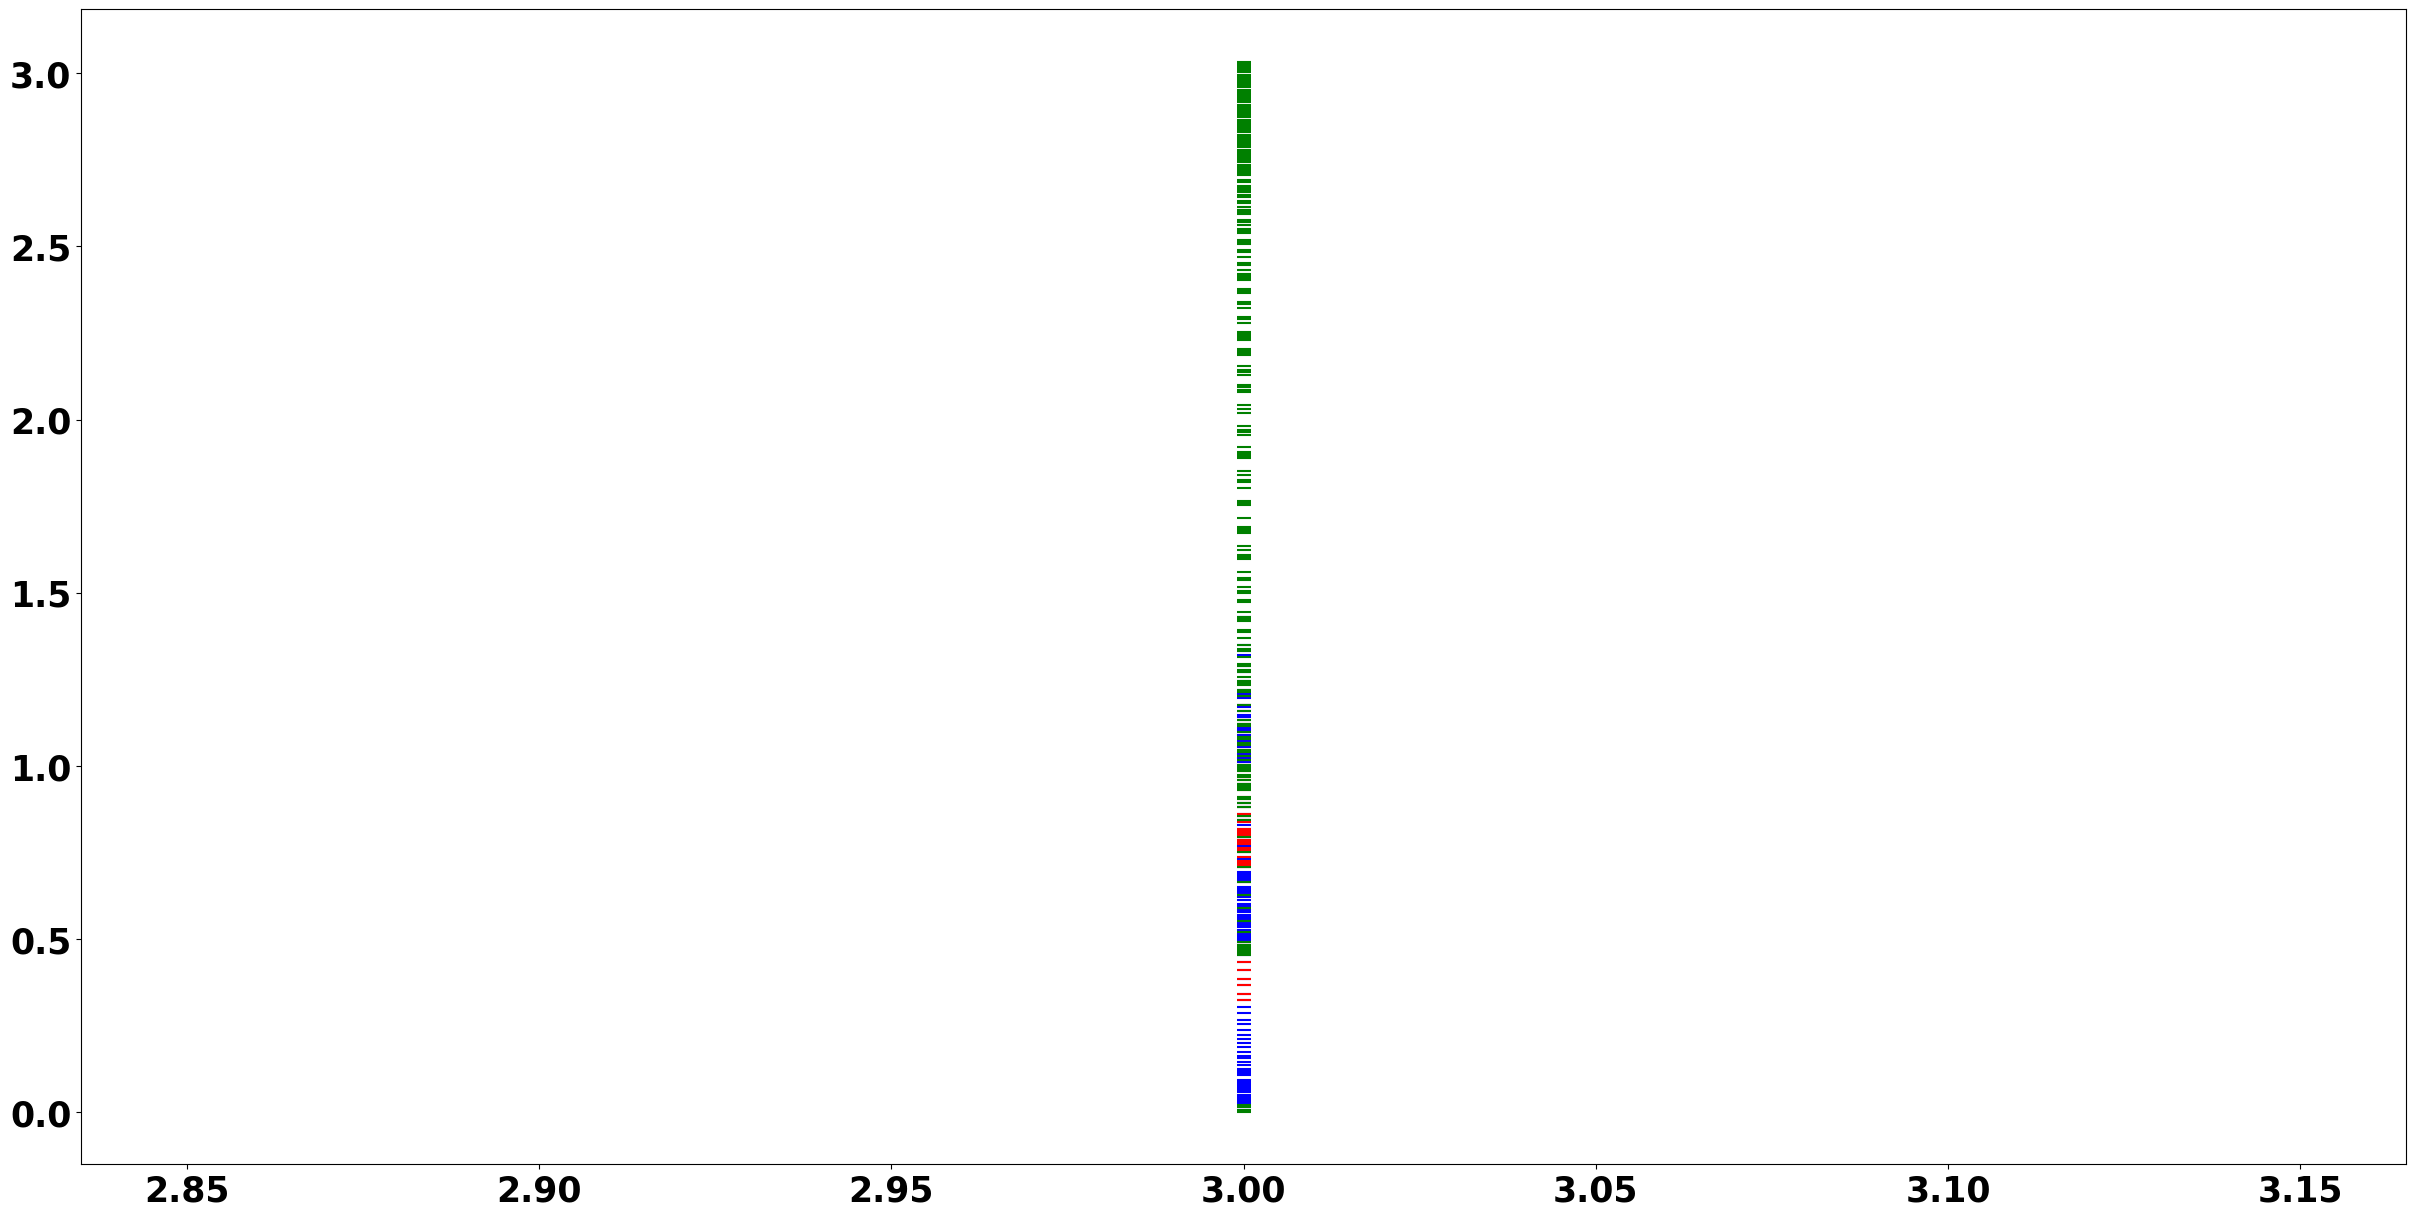

491 (138, 7)
491 (61, 7)
491 (223, 7)


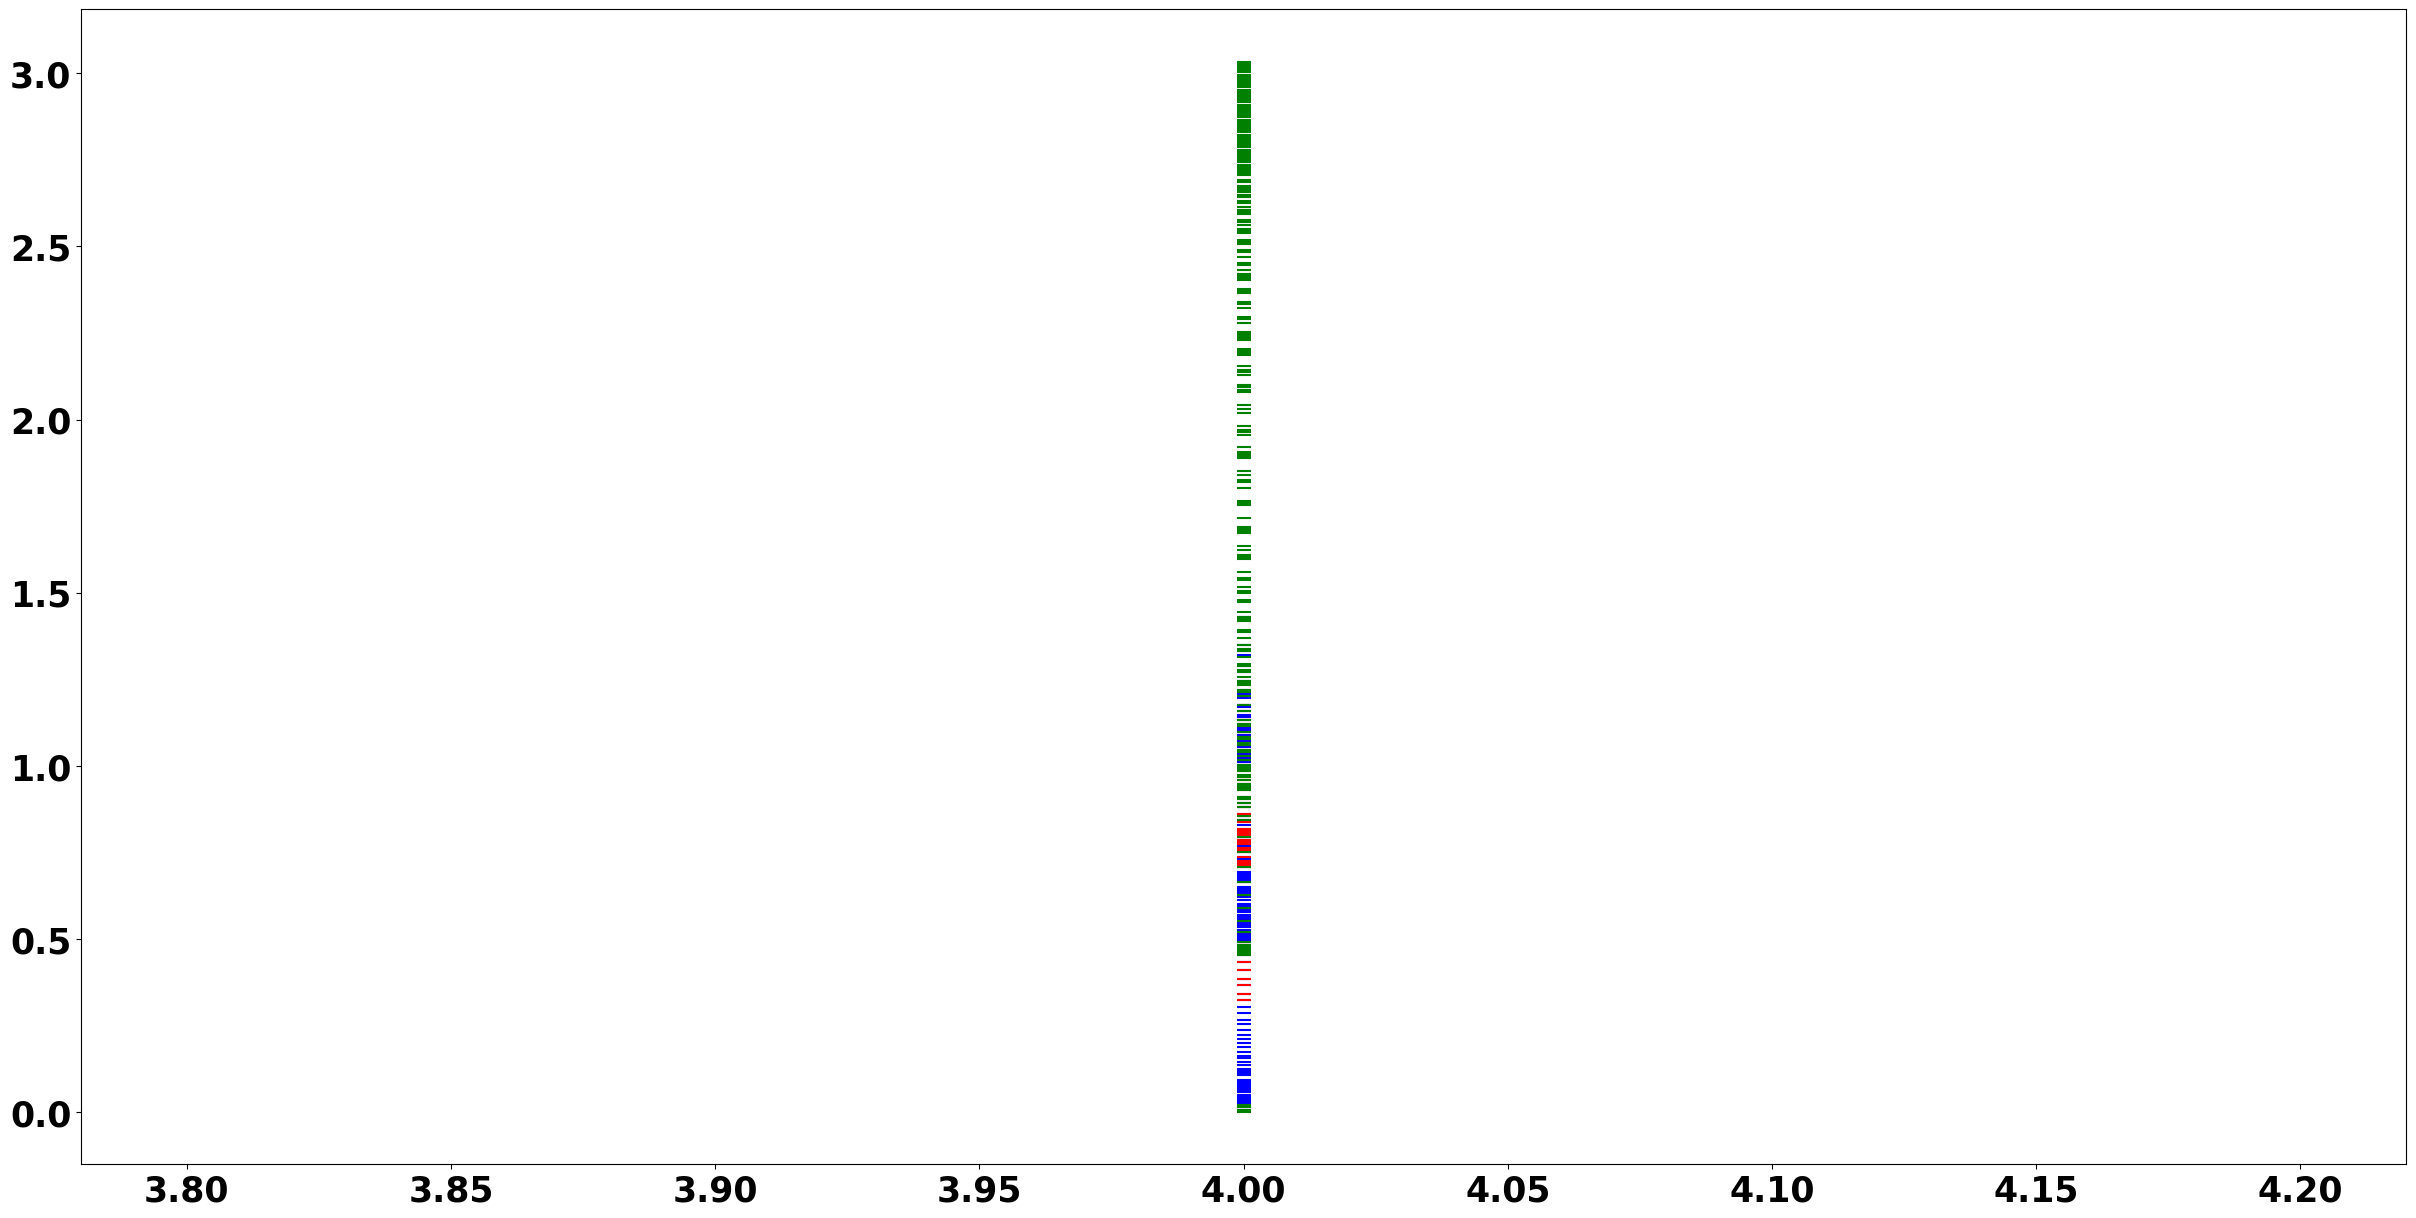

491 (138, 7)
491 (61, 7)
491 (223, 7)


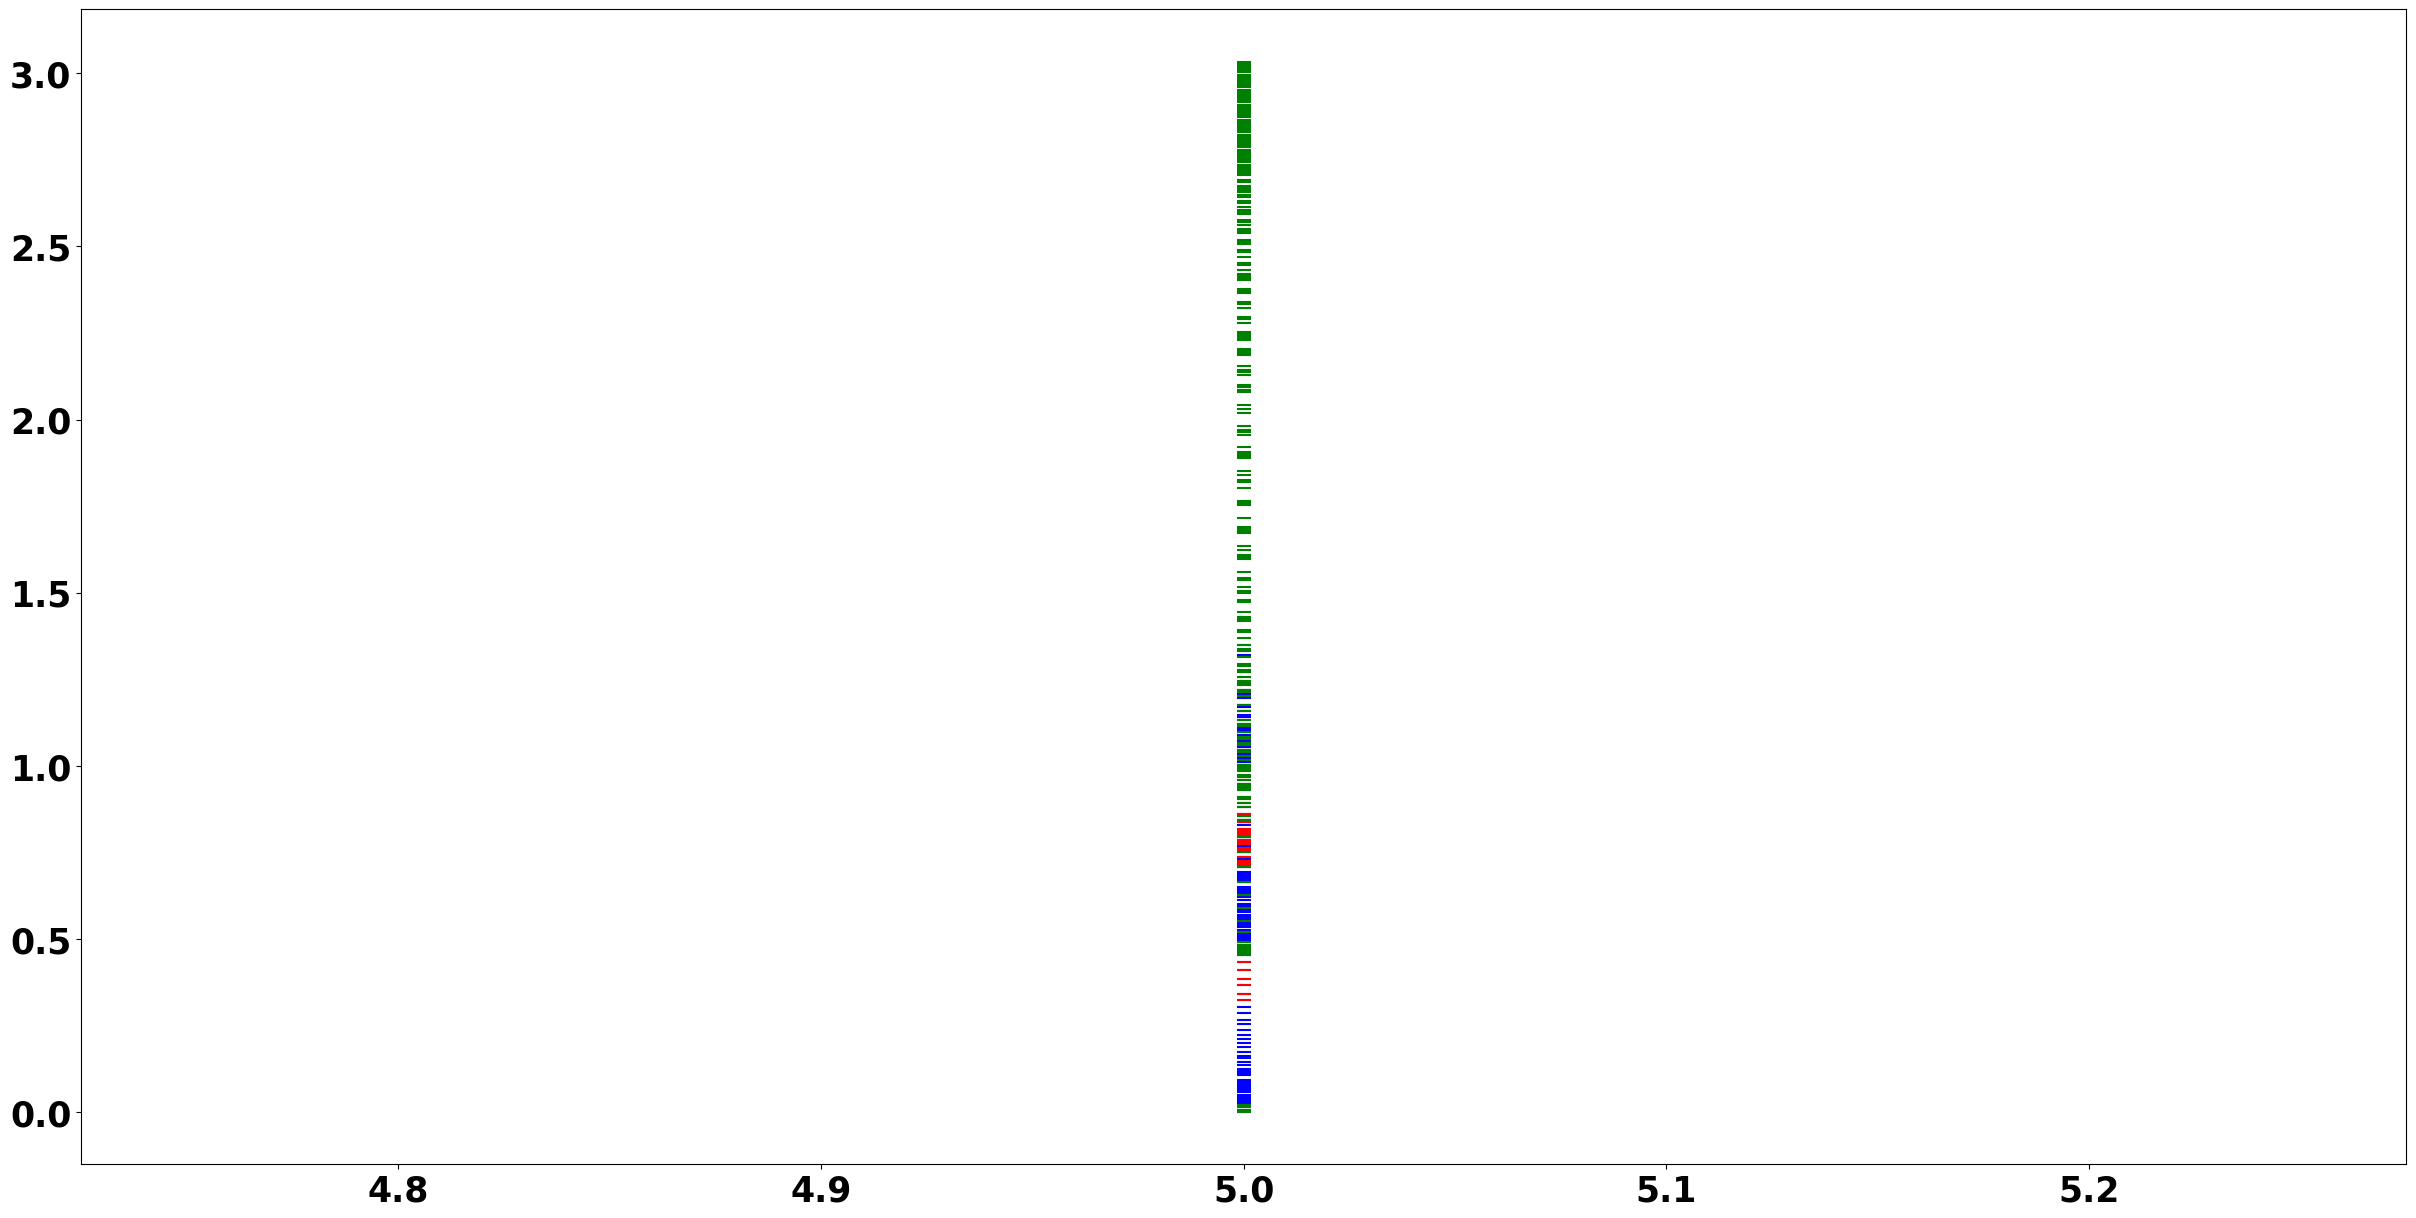

491 (138, 7)
491 (61, 7)
491 (223, 7)


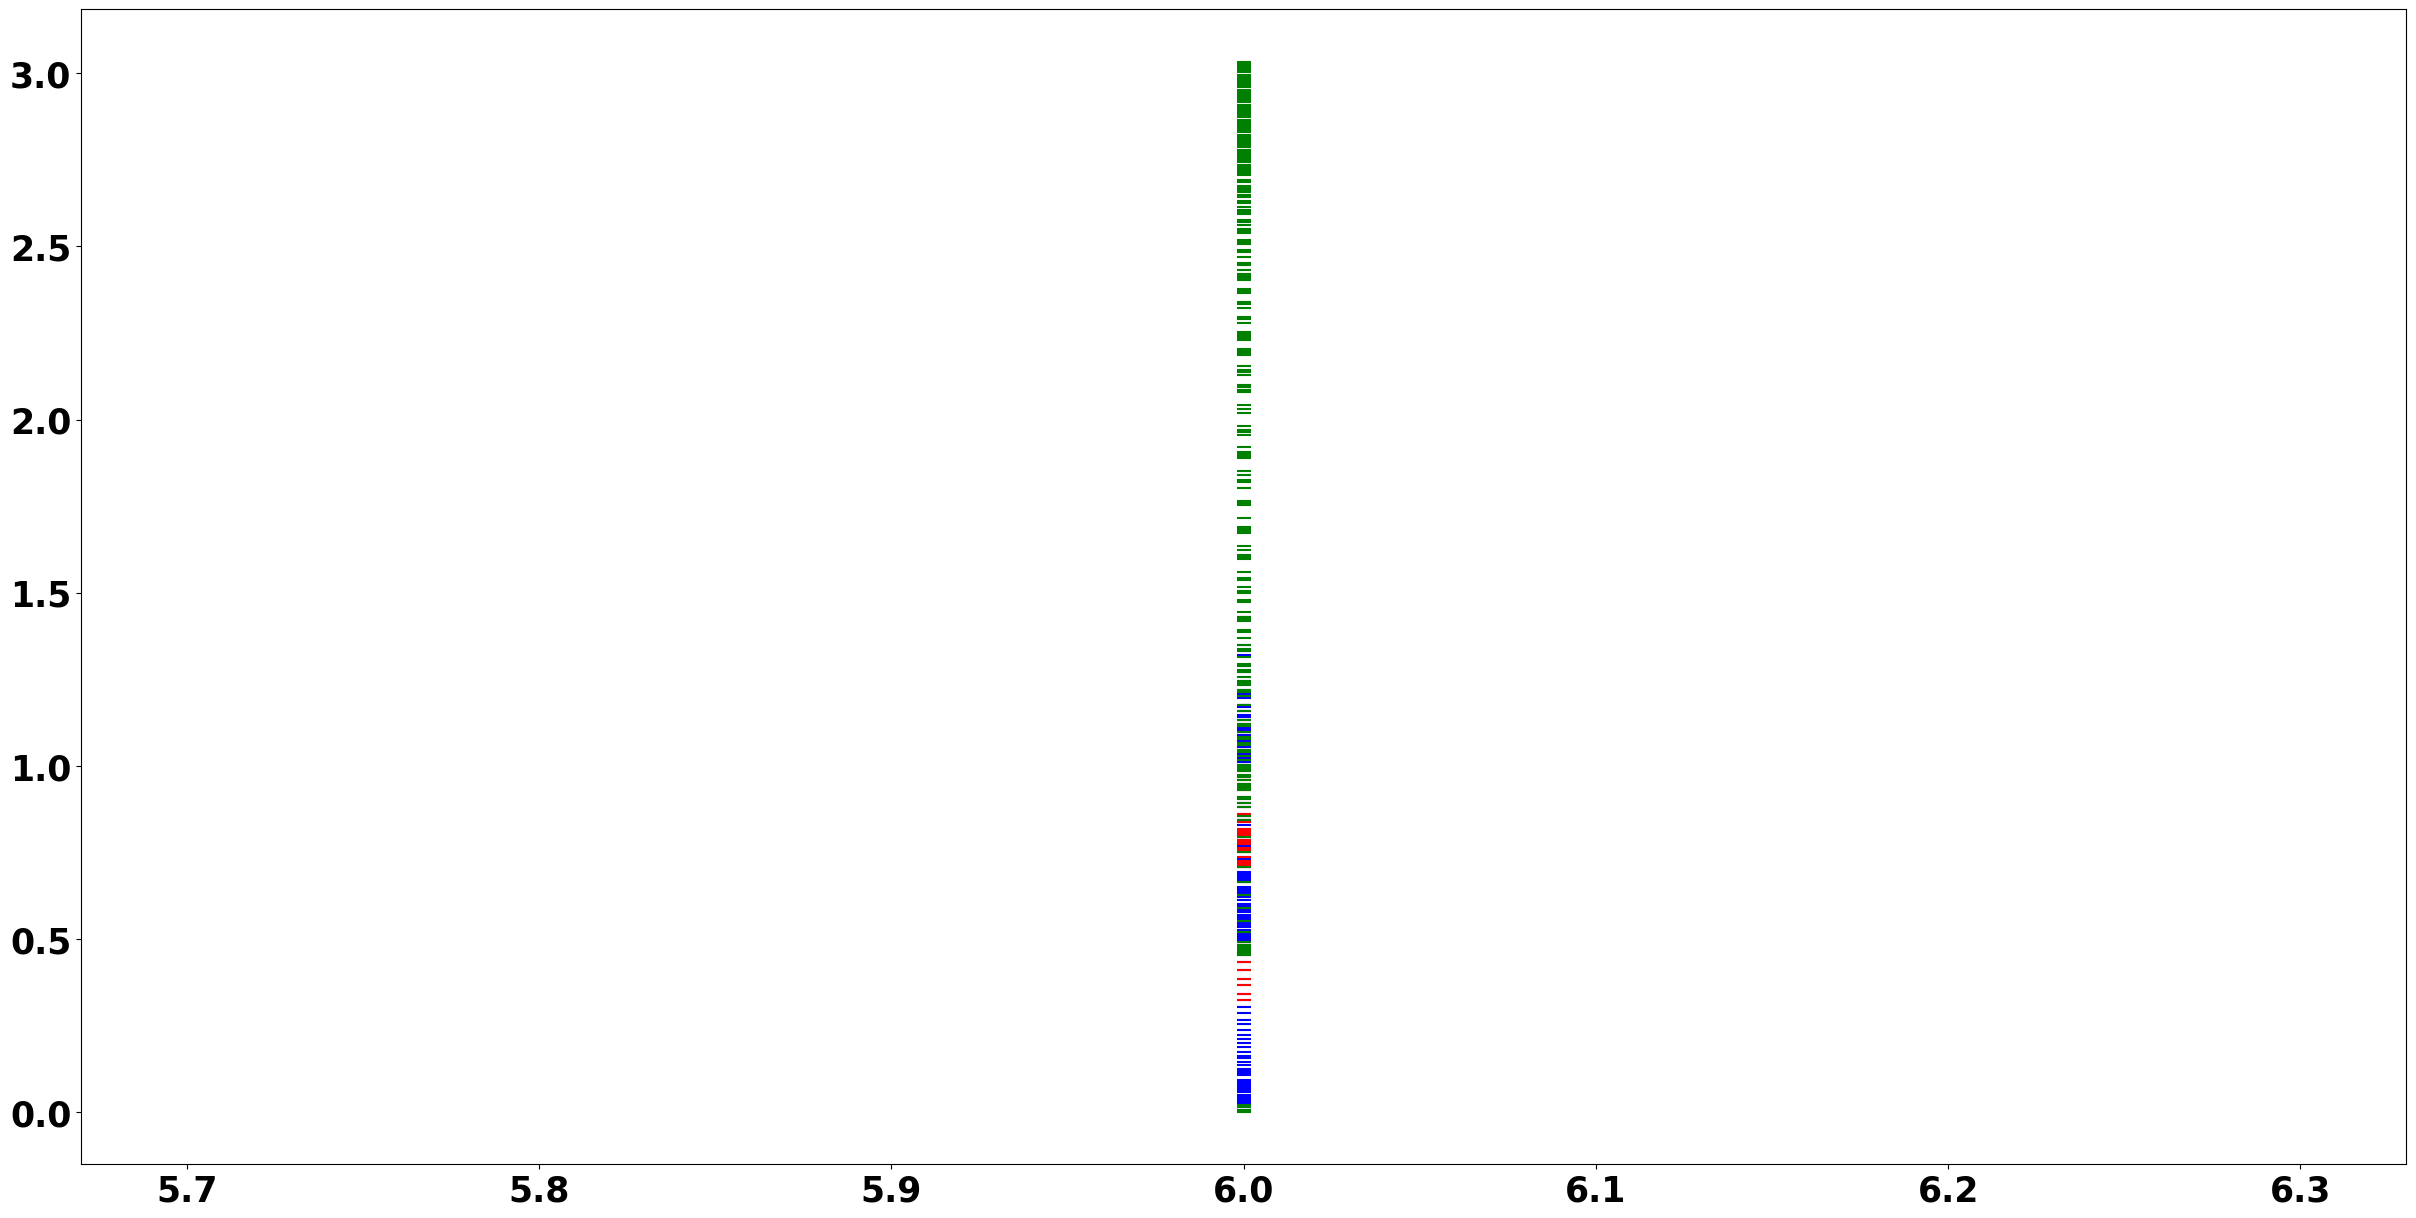

491 (138, 7)
491 (61, 7)
491 (223, 7)


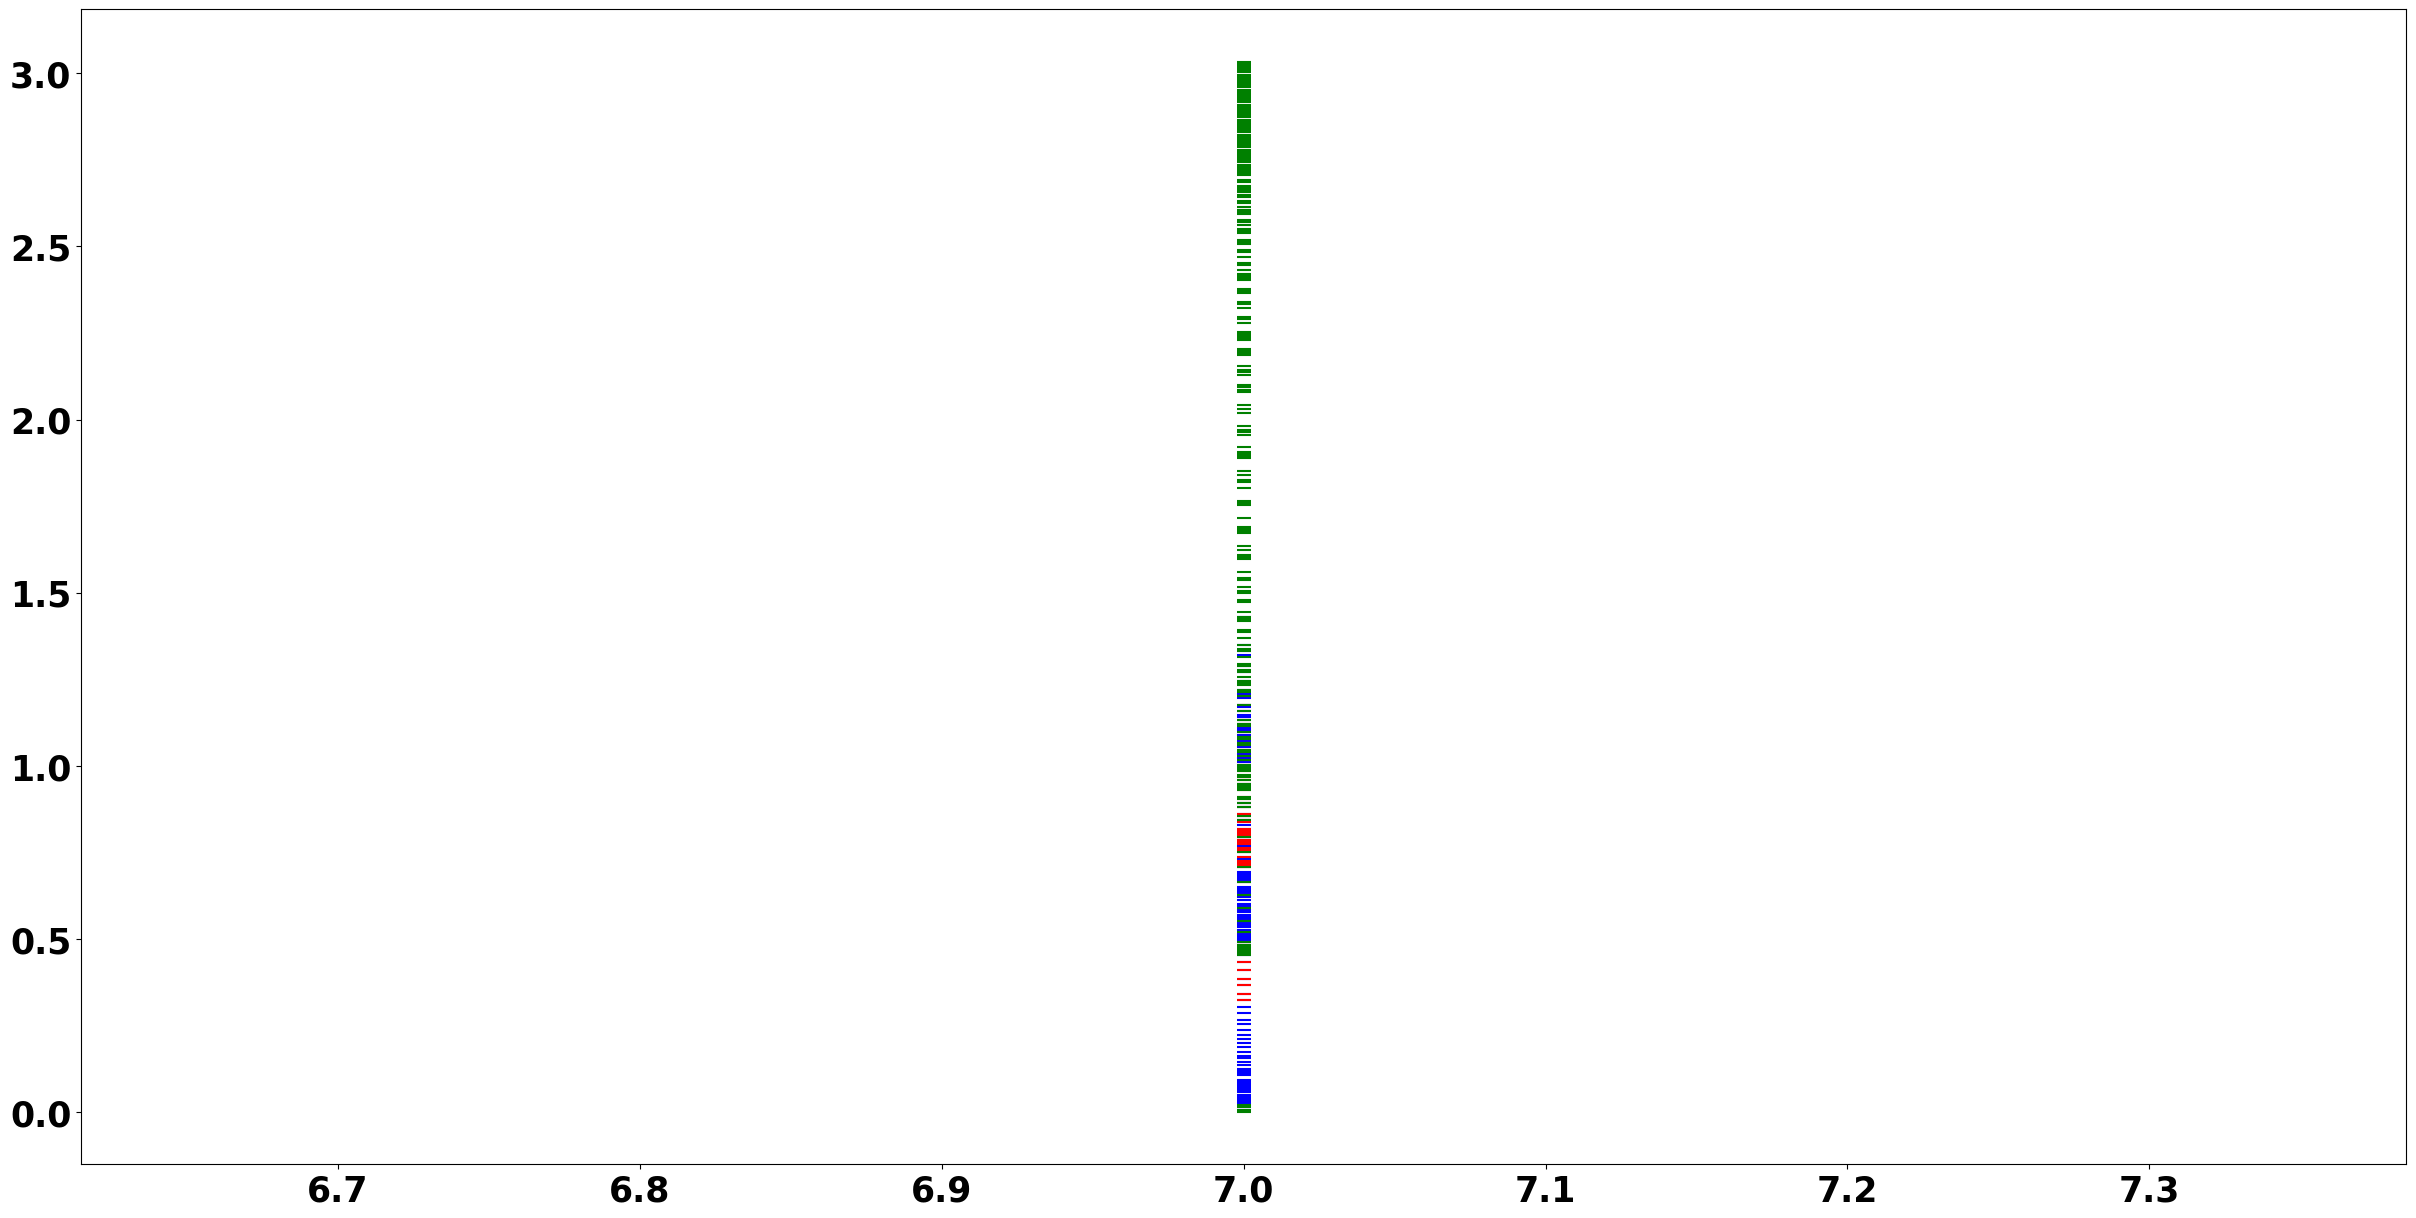

418 (99, 7)
418 (56, 7)
418 (219, 7)


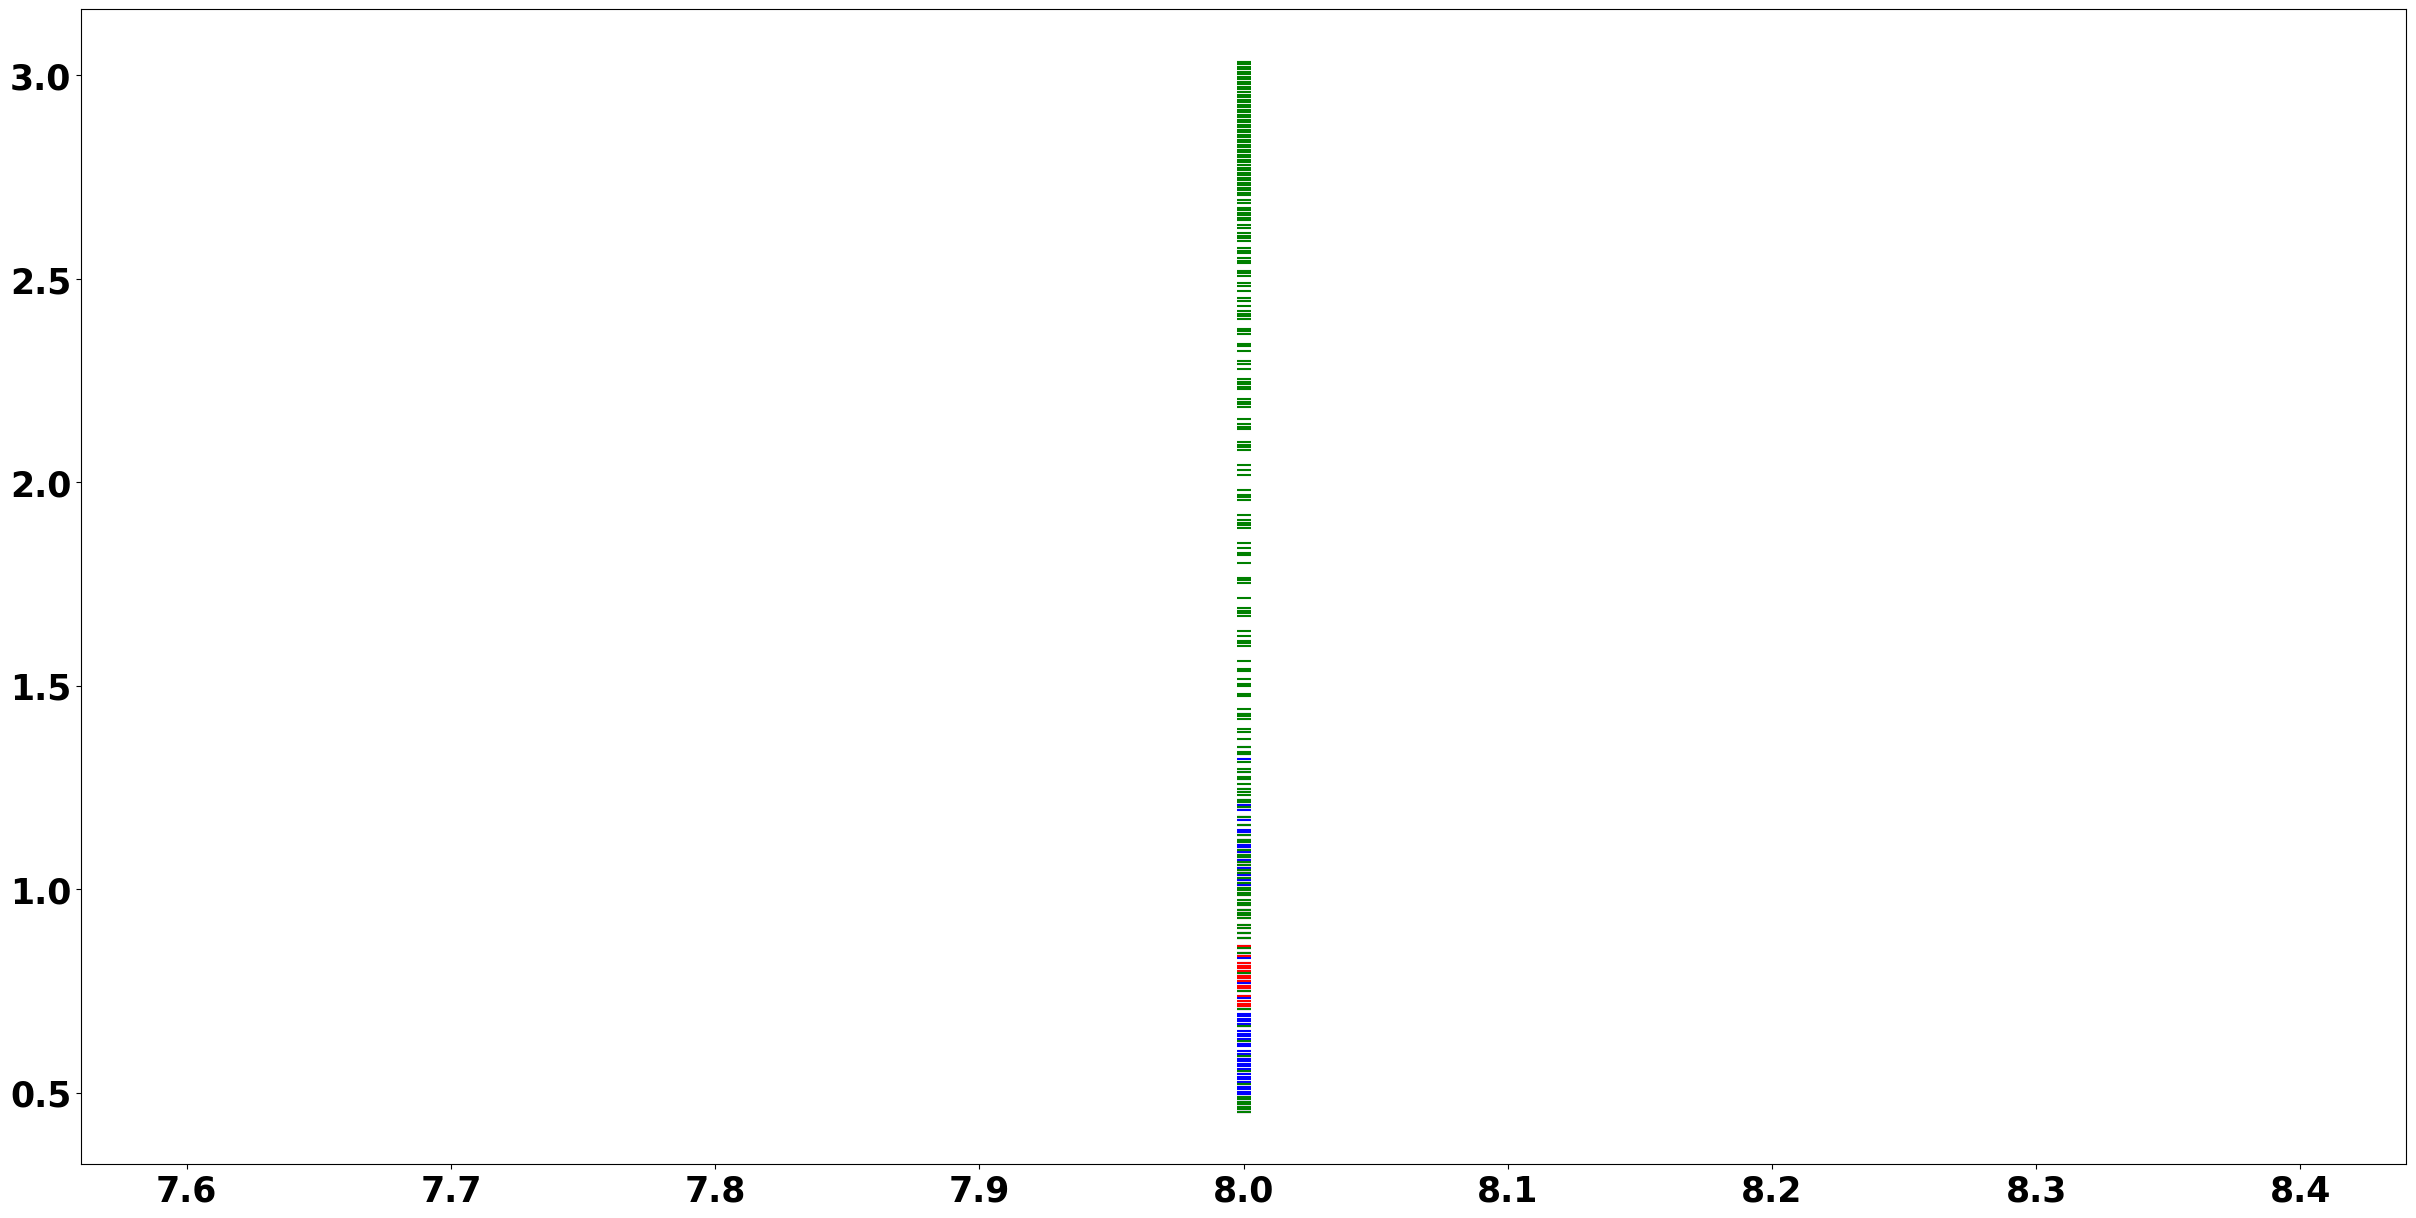

In [80]:
locations = [0.05, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]

for l in range(len(REF)):
    
    loc = locations[l]
    
    indicies0 = np.loadtxt('X'+str(l)+'_c0.index').astype(int)
    indicies1 = np.loadtxt('X'+str(l)+'_c1.index').astype(int)
    indicies2 = np.loadtxt('X'+str(l)+'_c2.index').astype(int)
    
    data0 = REF[l][indicies0,:]
    data1 = REF[l][indicies1,:]
    data2 = REF[l][indicies2,:]
    
    print(len(REF[l]), data0.shape)
    print(len(REF[l]), data1.shape)
    print(len(REF[l]), data2.shape)
    
    plt.figure(figsize=(30,15), frameon=False)
    #plt.scatter(c0['X'], c0['Y'],                      s=100, c='b', marker='o')
    #plt.scatter(c1['X'], c1['Y'],                      s=100, c='r', marker='o')
    #plt.scatter(c2['X'], c2['Y'],                      s=100, c='g', marker='o')
    plt.scatter(loc*np.ones(data0.shape[0]), data0[:,0], s=100, c='b', marker="_")
    plt.scatter(loc*np.ones(data1.shape[0]), data1[:,0], s=100, c='r', marker="_")
    plt.scatter(loc*np.ones(data2.shape[0]), data2[:,0], s=100, c='g', marker="_")
    plt.show()

In [62]:
l0c0

array([[ 1.43241704e+00,  9.85104680e-01,  6.84994608e-02,
         2.92717665e-02,  3.17029990e-02, -1.08816400e-02,
         4.48731557e-02],
       [ 1.34949958e+00,  9.89813268e-01,  6.93972111e-02,
         2.88073141e-02,  3.16342749e-02, -9.46607441e-03,
         4.63227816e-02],
       [ 1.33204329e+00,  9.91340160e-01,  6.92733303e-02,
         2.86872760e-02,  3.13929282e-02, -9.09631792e-03,
         4.66394052e-02],
       [ 1.31895113e+00,  9.92561638e-01,  6.91023618e-02,
         2.85984539e-02,  3.11483126e-02, -8.79656617e-03,
         4.68977056e-02],
       [ 1.28403854e+00,  9.95964468e-01,  6.82158545e-02,
         2.84502339e-02,  3.01708505e-02, -7.89191201e-03,
         4.77157272e-02],
       [ 1.27094626e+00,  9.97388423e-01,  6.77153170e-02,
         2.84158383e-02,  2.96674389e-02, -7.51273427e-03,
         4.80740666e-02],
       [ 1.24039781e+00,  1.00113523e+00,  6.61480874e-02,
         2.83677094e-02,  2.81708948e-02, -6.53511519e-03,
         4.9083367